In [1]:
import os
import sys
import numpy as np
import pandas as pd
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device('cpu')
device

device(type='cuda')

## Check availability of GPU

In [2]:
import torch
import torch.nn as nn

# Define a simple model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(10, 2)

    def forward(self, x):
        return self.fc(x)

# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available!")
    print("Using GPU:", torch.cuda.get_device_name(0))  # Getting the name of the GPU
else:
    device = torch.device("cpu")
    print("CUDA is not available. Switching to CPU.")

# Create an instance of the model
model = SimpleModel().to(device)

# Create dummy input data
input_data = torch.randn(5, 10).to(device)

# Pass input data through the model
output = model(input_data)

print("Model output shape:", output.shape)

CUDA is available!
Using GPU: NVIDIA GeForce RTX 4090 Laptop GPU
Model output shape: torch.Size([5, 2])


## Loading training data

In [9]:
signals = pd.read_csv("wind-farm-1-signals-training.csv", sep=';')
signals.head()

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T11,2016-01-01T00:00:00+00:00,1339.4,1233.3,1270.9,18.8,42.0,59,61,60,...,-973.4,-752.6,-1000.0,56.5,973.4,1000.0,752.6,56.5,38,206.9
1,T06,2016-01-01T00:00:00+00:00,1270.0,1232.8,1248.5,6.8,42.0,51,52,53,...,-307.1,0.0,-880.6,180.0,307.1,880.6,0.0,180.0,35,204.6
2,T01,2016-01-01T00:00:00+00:00,1277.4,1226.1,1249.0,9.0,41.0,58,59,58,...,-144.4,0.0,-584.5,157.1,144.4,584.5,0.0,157.1,37,218.5
3,T09,2016-01-01T00:00:00+00:00,1376.7,1234.3,1272.0,24.7,40.0,58,57,58,...,-861.6,-224.5,-1000.0,185.5,861.6,1000.0,224.5,185.5,33,214.0
4,T07,2016-01-01T00:00:00+00:00,1317.5,1229.5,1254.9,13.8,41.0,62,62,61,...,-536.5,0.0,-1000.0,338.9,536.5,1000.0,0.0,338.9,39,197.3


In [10]:
metmast = pd.read_csv("wind-farm-1-metmast-training.csv", sep=';')
metmast.head()

,Timestamp,Min_Windspeed1,Max_Windspeed1,Avg_Windspeed1,Var_Windspeed1,Min_Windspeed2,Max_Windspeed2,Avg_Windspeed2,Var_Windspeed2,Min_Winddirection2,...,Anemometer1_CorrOffset,Anemometer2_Freq,Anemometer2_Offset,Anemometer2_CorrGain,Anemometer2_CorrOffset,DistanceAirPress,AirRessureSensorZeroOffset,Anemometer1_Avg_Freq,Anemometer2_Avg_Freq,Pressure_Avg_Freq
0,2016-01-01T00:00:00+00:00,3.7,6.0,5.1,0.21,3.8,6.0,5.1,0.22,236.0,...,0,0.0499,0.24,1,0,0,600,98,99,418
1,2016-01-01T00:10:00+00:00,4.1,6.0,5.1,0.09,4.1,6.0,5.2,0.10,236.0,...,0,0.0499,0.24,1,0,0,600,99,101,418
2,2016-01-01T00:20:00+00:00,4.5,6.7,5.7,0.26,4.4,6.8,5.8,0.30,236.0,...,0,0.0499,0.24,1,0,0,600,111,113,418
3,2016-01-01T00:30:00+00:00,5.1,7.0,6.3,0.11,5.1,7.1,6.4,0.12,236.0,...,0,0.0499,0.24,1,0,0,600,122,125,418
4,2016-01-01T00:40:00+00:00,4.7,7.3,6.2,0.27,4.9,7.4,6.3,0.27,236.0,...,0,0.0499,0.24,1,0,0,600,121,123,417


## Search for duplicate data

In [11]:
# Check for duplicates based on 'Turbine_ID' and 'Timestamp'
duplicates = signals.duplicated(subset=['Turbine_ID', 'Timestamp'], keep=False)

# Display all rows that are duplicates based on 'Turbine_ID' and 'Timestamp'
print(signals[duplicates])

       Turbine_ID                  Timestamp  Gen_RPM_Max  Gen_RPM_Min  \
215185        T01  2016-10-30T02:00:00+00:00       1717.7       1410.7   
215186        T09  2016-10-30T02:00:00+00:00       1766.4       1620.2   
215187        T06  2016-10-30T02:00:00+00:00         76.8          9.4   
215188        T06  2016-10-30T02:00:00+00:00         69.5          0.0   
215189        T07  2016-10-30T02:00:00+00:00       1742.9       1639.5   
215190        T09  2016-10-30T02:00:00+00:00       1736.6       1580.9   
215191        T01  2016-10-30T02:00:00+00:00       1734.5       1637.7   
215192        T11  2016-10-30T02:00:00+00:00       1764.9       1611.1   
215193        T11  2016-10-30T02:00:00+00:00       1745.5       1626.2   
215194        T07  2016-10-30T02:00:00+00:00       1721.4       1616.5   
215195        T09  2016-10-30T02:10:00+00:00       1775.0       1607.8   
215196        T06  2016-10-30T02:10:00+00:00         75.5          0.0   
215197        T11  2016-10-30T02:10:00

In [5]:
# Check for duplicates based on 'Timestamp'
duplicates = metmast.duplicated(subset=['Timestamp'], keep=False)

# Display all rows that are duplicates based on 'Turbine_ID' and 'Timestamp'
print(metmast[duplicates])

Empty DataFrame
Columns: [Timestamp, Min_Windspeed1, Max_Windspeed1, Avg_Windspeed1, Var_Windspeed1, Min_Windspeed2, Max_Windspeed2, Avg_Windspeed2, Var_Windspeed2, Min_Winddirection2, Max_Winddirection2, Avg_Winddirection2, Var_Winddirection2, Min_AmbientTemp, Max_AmbientTemp, Avg_AmbientTemp, Min_Pressure, Max_Pressure, Avg_Pressure, Min_Humidity, Max_Humidity, Avg_Humidity, Min_Precipitation, Max_Precipitation, Avg_Precipitation, Min_Raindetection, Max_Raindetection, Avg_Raindetection, Anemometer1_Freq, Anemometer1_Offset, Anemometer1_CorrGain, Anemometer1_CorrOffset, Anemometer2_Freq, Anemometer2_Offset, Anemometer2_CorrGain, Anemometer2_CorrOffset, DistanceAirPress, AirRessureSensorZeroOffset, Anemometer1_Avg_Freq, Anemometer2_Avg_Freq, Pressure_Avg_Freq]
Index: []

[0 rows x 41 columns]


## Preprocessing data

In this cell, several functions are defined and then executed to preprocess and manipulate data contained in DataFrames.

### Function Definitions:

#### `average_duplicates`
- This function calculates the average of duplicate entries in a DataFrame based on specified grouping columns, which by default are 'Turbine_ID' and 'Timestamp'. 
- It ensures that the 'Timestamp' column is in the proper datetime format and then groups the DataFrame by the specified columns, calculating the mean for each group.

#### `merge_and_fill`
- This function merges two DataFrames, `signals` and `metmast`, based on their 'Timestamp' columns, ensuring all timestamps are retained.
- It fills missing values in the second DataFrame (`metmast`) by forward filling NaN values for its columns.

#### `fill_missing_signal_data`
- This function fills missing signal data by creating a complete DataFrame with all combinations of timestamps and turbine IDs.
- It ensures that each combination of 'Turbine_ID' and 'Timestamp' is present in the DataFrame by merging with the original DataFrame and forward filling missing values.

### Execution:
- The functions are executed sequentially:
    1. `average_duplicates` is applied to `signals`.
    2. `fill_missing_signal_data` is applied to `signals`.
    3. `merge_and_fill` is executed with filled `signals` and `metmast`.

These functions together aim to preprocess the data, handle duplicates, fill missing values, and ensure compatibility between the two datasets for further analysis or modeling.


In [12]:
def average_duplicates(df, group_cols=['Turbine_ID', 'Timestamp']):
    # Ensure 'Timestamp' is in the proper datetime format
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # Group by the specified columns and calculate the mean for each group
    # This will automatically handle numeric columns and ignore non-numeric ones
    averaged_df = df.groupby(group_cols).mean().reset_index()

    return averaged_df


def merge_and_fill(signals, metmast):
    # Convert the 'Timestamp' column to datetime in both DataFrames
    signals['Timestamp'] = pd.to_datetime(signals['Timestamp'])
    metmast['Timestamp'] = pd.to_datetime(metmast['Timestamp'])

    # Create a DataFrame with unique timestamps from both DataFrames
    unique_timestamps = pd.Series(pd.unique(signals['Timestamp'])).to_frame(name='Timestamp')
    
    # Merge the two DataFrames on 'Timestamp', retaining all timestamps
    metmast = pd.merge(unique_timestamps, metmast, on='Timestamp', how='left').sort_values(by='Timestamp')
    
    # Forward fill the NaN values for the second DataFrame's columns
    second_df_columns = metmast.columns.drop('Timestamp')
    metmast[second_df_columns] = metmast[second_df_columns].ffill()
    
    return signals, metmast


def fill_missing_signal_data(df):
    # Convert 'Timestamp' to datetime format
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # Get unique timestamps and IDs
    unique_timestamps = np.sort(pd.unique(df['Timestamp']))
    unique_ids = np.sort(pd.unique(df['Turbine_ID']))
    
    # Create a complete DataFrame with all combinations of IDs and timestamps
    complete_df = pd.MultiIndex.from_product([unique_ids, unique_timestamps], names=['Turbine_ID', 'Timestamp']).to_frame(index=False)
    
    # Merge the complete DataFrame with the original to ensure all combinations are present
    df_full = pd.merge(complete_df, df, on=['Turbine_ID', 'Timestamp'], how='left').sort_values(by=['Turbine_ID', 'Timestamp'])
    
    # Forward fill NaN values for each ID without setting 'Turbine_ID' as index
    turbine_id = df_full['Turbine_ID'].copy()
    df_filled = df_full.groupby('Turbine_ID', as_index=False).ffill()
    df_filled.insert(0, "Turbine_ID", turbine_id)
    
    return df_filled


signals = average_duplicates(signals)
signals = fill_missing_signal_data(signals)
signals, metmast = merge_and_fill(signals, metmast)

In [26]:
print(f"The number of signals data we have: {len(signals)}")
print(f"The number of metmast data we have: {len(metmast)}")
assert len(signals) == 5 * len(metmast)

The number of signals data we have: 436710
The number of metmast data we have: 87342


## Loading label data

In [6]:
failures = pd.read_csv("htw-failures-training.csv")
failures.head()

,Turbine_ID,Component,Timestamp,Remarks
0,T11,GENERATOR,2016-03-03T19:00:00+00:00,Electric circuit error in generator
1,T06,HYDRAULIC_GROUP,2016-04-04T18:53:00+00:00,Error in pitch regulation
2,T07,GENERATOR_BEARING,2016-04-30T12:40:00+00:00,High temperature in generator bearing (replace...
3,T09,GENERATOR_BEARING,2016-06-07T16:59:00+00:00,High tempemperature generator bearing
4,T07,TRANSFORMER,2016-07-10T03:46:00+00:00,High temperature transformer


In [6]:
print(f"The number of failure we have: {len(failures)}")

The number of failure we have: 23


In [6]:
# Produce a table showing the component failures for each Turbine ID
failures_table = failures.groupby(['Turbine_ID','Component']).size().unstack(fill_value=0)
failures_table

Component,GEARBOX,GENERATOR,GENERATOR_BEARING,HYDRAULIC_GROUP,TRANSFORMER
Turbine_ID,,,,,
T01,1,0,0,0,1
T06,0,5,0,2,0
T07,0,1,2,1,2
T09,1,0,4,0,0
T11,0,1,0,2,0


## Set timestamp and sort

In [13]:
import pandas as pd

# First, ensure the Timestamp is sorted
signals['Timestamp'] = pd.to_datetime(signals['Timestamp'])
signals.sort_values(by=['Turbine_ID', 'Timestamp'], inplace=True)
signals.reset_index(drop=True, inplace=True)
signals.head()

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T01,2016-01-01 00:00:00+00:00,1277.4,1226.1,1249.0,9.0,41.0,58.0,59.0,58.0,...,-144.4,0.0,-584.5,157.1,144.4,584.5,0.0,157.1,37.0,218.5
1,T01,2016-01-01 00:10:00+00:00,1268.3,93.3,999.7,435.9,41.0,58.0,59.0,59.0,...,-79.6,0.0,-501.0,123.7,79.6,501.0,0.0,123.7,37.0,218.5
2,T01,2016-01-01 00:20:00+00:00,1394.4,220.3,774.0,486.1,41.0,57.0,57.0,57.0,...,-314.0,0.0,-1000.0,357.4,314.0,1000.0,0.0,357.4,37.0,213.3
3,T01,2016-01-01 00:30:00+00:00,1306.6,1212.4,1257.1,17.0,40.0,56.0,57.0,57.0,...,-654.0,0.0,-1000.0,245.8,654.0,1000.0,0.0,245.8,36.0,222.4
4,T01,2016-01-01 00:40:00+00:00,1320.9,1224.1,1257.7,18.0,40.0,57.0,58.0,57.0,...,-496.1,0.0,-1000.0,302.7,496.1,1000.0,0.0,302.7,36.0,222.4


In [14]:
# First, ensure the Timestamp is sorted
metmast['Timestamp'] = pd.to_datetime(metmast['Timestamp'])
metmast.sort_values(by=['Timestamp'], inplace=True)
metmast.reset_index(drop=True, inplace=True)
metmast.head()

,Timestamp,Min_Windspeed1,Max_Windspeed1,Avg_Windspeed1,Var_Windspeed1,Min_Windspeed2,Max_Windspeed2,Avg_Windspeed2,Var_Windspeed2,Min_Winddirection2,...,Anemometer1_CorrOffset,Anemometer2_Freq,Anemometer2_Offset,Anemometer2_CorrGain,Anemometer2_CorrOffset,DistanceAirPress,AirRessureSensorZeroOffset,Anemometer1_Avg_Freq,Anemometer2_Avg_Freq,Pressure_Avg_Freq
0,2016-01-01 00:00:00+00:00,3.7,6.0,5.1,0.21,3.8,6.0,5.1,0.22,236.0,...,0.0,0.0499,0.24,1.0,0.0,0.0,600.0,98.0,99.0,418.0
1,2016-01-01 00:10:00+00:00,4.1,6.0,5.1,0.09,4.1,6.0,5.2,0.10,236.0,...,0.0,0.0499,0.24,1.0,0.0,0.0,600.0,99.0,101.0,418.0
2,2016-01-01 00:20:00+00:00,4.5,6.7,5.7,0.26,4.4,6.8,5.8,0.30,236.0,...,0.0,0.0499,0.24,1.0,0.0,0.0,600.0,111.0,113.0,418.0
3,2016-01-01 00:30:00+00:00,5.1,7.0,6.3,0.11,5.1,7.1,6.4,0.12,236.0,...,0.0,0.0499,0.24,1.0,0.0,0.0,600.0,122.0,125.0,418.0
4,2016-01-01 00:40:00+00:00,4.7,7.3,6.2,0.27,4.9,7.4,6.3,0.27,236.0,...,0.0,0.0499,0.24,1.0,0.0,0.0,600.0,121.0,123.0,417.0


## Fill Missing Values

In [15]:
# Group by Turbine_ID and then forward fill missing values within each group
signals_filled = signals.groupby('Turbine_ID').transform(lambda x: x.ffill())
signals_filled.insert(loc=0, column='Turbine_ID', value=signals['Turbine_ID'])

# Check if there are any remaining missing values after the forward fill
print(signals_filled.isnull().sum().sum())
signals_filled.head()

0


,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T01,2016-01-01 00:00:00+00:00,1277.4,1226.1,1249.0,9.0,41.0,58.0,59.0,58.0,...,-144.4,0.0,-584.5,157.1,144.4,584.5,0.0,157.1,37.0,218.5
1,T01,2016-01-01 00:10:00+00:00,1268.3,93.3,999.7,435.9,41.0,58.0,59.0,59.0,...,-79.6,0.0,-501.0,123.7,79.6,501.0,0.0,123.7,37.0,218.5
2,T01,2016-01-01 00:20:00+00:00,1394.4,220.3,774.0,486.1,41.0,57.0,57.0,57.0,...,-314.0,0.0,-1000.0,357.4,314.0,1000.0,0.0,357.4,37.0,213.3
3,T01,2016-01-01 00:30:00+00:00,1306.6,1212.4,1257.1,17.0,40.0,56.0,57.0,57.0,...,-654.0,0.0,-1000.0,245.8,654.0,1000.0,0.0,245.8,36.0,222.4
4,T01,2016-01-01 00:40:00+00:00,1320.9,1224.1,1257.7,18.0,40.0,57.0,58.0,57.0,...,-496.1,0.0,-1000.0,302.7,496.1,1000.0,0.0,302.7,36.0,222.4


In [16]:
# Forward fill missing values
metmast_filled = metmast.ffill()

# Check if there are any remaining missing values after the forward fill
print(metmast_filled.isnull().sum().sum())
metmast_filled.head()

0


,Timestamp,Min_Windspeed1,Max_Windspeed1,Avg_Windspeed1,Var_Windspeed1,Min_Windspeed2,Max_Windspeed2,Avg_Windspeed2,Var_Windspeed2,Min_Winddirection2,...,Anemometer1_CorrOffset,Anemometer2_Freq,Anemometer2_Offset,Anemometer2_CorrGain,Anemometer2_CorrOffset,DistanceAirPress,AirRessureSensorZeroOffset,Anemometer1_Avg_Freq,Anemometer2_Avg_Freq,Pressure_Avg_Freq
0,2016-01-01 00:00:00+00:00,3.7,6.0,5.1,0.21,3.8,6.0,5.1,0.22,236.0,...,0.0,0.0499,0.24,1.0,0.0,0.0,600.0,98.0,99.0,418.0
1,2016-01-01 00:10:00+00:00,4.1,6.0,5.1,0.09,4.1,6.0,5.2,0.10,236.0,...,0.0,0.0499,0.24,1.0,0.0,0.0,600.0,99.0,101.0,418.0
2,2016-01-01 00:20:00+00:00,4.5,6.7,5.7,0.26,4.4,6.8,5.8,0.30,236.0,...,0.0,0.0499,0.24,1.0,0.0,0.0,600.0,111.0,113.0,418.0
3,2016-01-01 00:30:00+00:00,5.1,7.0,6.3,0.11,5.1,7.1,6.4,0.12,236.0,...,0.0,0.0499,0.24,1.0,0.0,0.0,600.0,122.0,125.0,418.0
4,2016-01-01 00:40:00+00:00,4.7,7.3,6.2,0.27,4.9,7.4,6.3,0.27,236.0,...,0.0,0.0499,0.24,1.0,0.0,0.0,600.0,121.0,123.0,417.0


## Standardization

In [17]:
# Create a list of feature columns by excluding the first two columns
feature_columns = signals_filled.columns[2:]

# Convert the relevant portion of the DataFrame to a NumPy array for fast computation
features_array = signals_filled[feature_columns].to_numpy()

# Compute the mean and std dev row-wise
means = np.mean(features_array, axis=1, keepdims=True)
std_devs = np.std(features_array, axis=1, keepdims=True)

# Apply z-score standardization
standardized_features = (features_array - means) / std_devs

# Replace NaN values in the standardized array (resulting from division by zero if std_dev is 0)
standardized_features = np.nan_to_num(standardized_features)

# Put the standardized data back into the DataFrame
signals_filled[feature_columns] = standardized_features

# Now, signals_filled has the original first two columns unchanged, and the rest of the feature columns standardized
signals_filled.head()


,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T01,2016-01-01 00:00:00+00:00,1.055091,1.010812,1.030578,-0.039716,-0.012096,0.002578,0.003441,0.002578,...,-0.172122,-0.047484,-0.551990,0.088115,0.077153,0.457021,-0.047484,0.088115,-0.015548,0.141112
1,T01,2016-01-01 00:10:00+00:00,1.579774,0.113052,1.244488,0.540711,0.047767,0.068988,0.070236,0.070236,...,-0.102775,-0.003412,-0.628797,0.151000,0.095951,0.621973,-0.003412,0.151000,0.042774,0.269336
2,T01,2016-01-01 00:20:00+00:00,0.681091,-0.041246,0.299405,0.122281,-0.151556,-0.141712,-0.141712,-0.141712,...,-0.369961,-0.176780,-0.792006,0.043102,0.016401,0.438446,-0.176780,0.043102,-0.154017,-0.045553
3,T01,2016-01-01 00:30:00+00:00,0.238172,0.216508,0.226788,-0.058408,-0.053118,-0.049439,-0.049209,-0.049209,...,-0.212723,-0.062318,-0.292296,-0.005789,0.088088,0.167661,-0.062318,-0.005789,-0.054038,-0.011170
4,T01,2016-01-01 00:40:00+00:00,0.340849,0.311965,0.321991,-0.047911,-0.041347,-0.036274,-0.035976,-0.036274,...,-0.201308,-0.053282,-0.351662,0.037038,0.094745,0.245098,-0.053282,0.037038,-0.042540,0.013078


In [18]:
# Create a list of feature columns by excluding the Timestamp column
feature_columns = metmast_filled.columns[1:]

# Convert the relevant portion of the DataFrame to a NumPy array for fast computation
features_array = metmast_filled[feature_columns].to_numpy()

# Compute the mean and std dev row-wise
means = np.mean(features_array, axis=1, keepdims=True)
std_devs = np.std(features_array, axis=1, keepdims=True)

# Apply z-score standardization
standardized_features = (features_array - means) / std_devs

# Replace NaN values in the standardized array (resulting from division by zero if std_dev is 0)
standardized_features = np.nan_to_num(standardized_features)

# Put the standardized data back into the DataFrame
metmast_filled[feature_columns] = standardized_features

# Now, metmast_filled has the Timestamp column unchanged, and the rest of the feature columns standardized
metmast_filled.head()

,Timestamp,Min_Windspeed1,Max_Windspeed1,Avg_Windspeed1,Var_Windspeed1,Min_Windspeed2,Max_Windspeed2,Avg_Windspeed2,Var_Windspeed2,Min_Winddirection2,...,Anemometer1_CorrOffset,Anemometer2_Freq,Anemometer2_Offset,Anemometer2_CorrGain,Anemometer2_CorrOffset,DistanceAirPress,AirRessureSensorZeroOffset,Anemometer1_Avg_Freq,Anemometer2_Avg_Freq,Pressure_Avg_Freq
0,2016-01-01 00:00:00+00:00,-0.461677,-0.453475,-0.456685,-0.474122,-0.461321,-0.453475,-0.456685,-0.474087,0.366696,...,-0.474871,-0.474693,-0.474015,-0.471305,-0.474871,-0.474871,1.664707,-0.125407,-0.121841,1.015701
1,2016-01-01 00:10:00+00:00,-0.460232,-0.453456,-0.456666,-0.474532,-0.460232,-0.453456,-0.456309,-0.474496,0.366751,...,-0.474853,-0.474675,-0.473997,-0.471287,-0.474853,-0.474853,1.664819,-0.121807,-0.114675,1.015785
2,2016-01-01 00:20:00+00:00,-0.462302,-0.454453,-0.458021,-0.477430,-0.462659,-0.454096,-0.457664,-0.477287,0.363645,...,-0.478358,-0.478180,-0.477501,-0.474790,-0.478358,-0.478358,1.662328,-0.082331,-0.075195,1.012987
3,2016-01-01 00:30:00+00:00,-0.462418,-0.455636,-0.458134,-0.480230,-0.462418,-0.455279,-0.457777,-0.480194,0.361791,...,-0.480623,-0.480444,-0.479766,-0.477053,-0.480623,-0.480623,1.661106,-0.045138,-0.034429,1.011448
4,2016-01-01 00:40:00+00:00,-0.463740,-0.454458,-0.458385,-0.479555,-0.463026,-0.454101,-0.458028,-0.479555,0.362008,...,-0.480519,-0.480341,-0.479662,-0.476949,-0.480519,-0.480519,1.661499,-0.048545,-0.041405,1.008184


This cell contains several utility functions and classes for preprocessing and handling data, particularly for predictive maintenance tasks.

### Function and Class Definitions:

#### `process_signal_data`
- This function preprocesses signal data by aligning failure timestamps with signal data timestamps within a specified window size. It creates new columns indicating the number of days until failure for each component.
- Input:
  - `signal_data`: DataFrame containing signal data.
  - `failure_data`: DataFrame containing failure data.
  - `window_size`: Size of the window before a failure to consider for analysis.
- Output:
  - Processed signal data DataFrame.

#### `get_all_feature_label`
- This function preprocesses signal data to extract features and labels for all turbines combined. It creates sliding windows of data and labels each window based on whether a failure occurs within the window.
- Input:
  - `signal_data`: DataFrame containing signal data.
  - `component`: Component type to consider for labeling failures (default is 'all').
  - `window_size`: Size of the sliding window.
  - `method`: Whether to perform classification or regression ('classification' by default).
- Output:
  - Features tensor.
  - Labels tensor.

#### `get_ind_feature_label`
- This function preprocesses signal data to extract features and labels for a specific turbine and component. It creates sliding windows of data and labels each window based on whether a failure occurs within the window.
- Input:
  - `signal_data`: DataFrame containing signal data.
  - `turbine_id`: ID of the turbine.
  - `component`: Component type to consider for labeling failures.
  - `window_size`: Size of the sliding window.
  - `method`: Whether to perform classification or regression.
- Output:
  - Features tensor.
  - Labels tensor.

#### `process_metmast_data`
- This function preprocesses meteorological mast data by creating sliding windows of data.
- Input:
  - `metmast_data`: DataFrame containing meteorological mast data.
  - `window_size`: Size of the sliding window.
  - `repeat`: Number of times to repeat each window along a new axis.
- Output:
  - Processed meteorological mast data tensor.

#### `split_data`
- This function splits the combined signal and meteorological mast data into training and validation sets.
- Input:
  - `X_signal`: Features tensor for signal data.
  - `y_signal`: Labels tensor for signal data.
  - `X_metmast`: Features tensor for meteorological mast data.
  - `num_parts`: Number of parts to split the data into.
  - `train_ratio`: Ratio of training data to total data.
- Output:
  - Training and validation sets for signal data and meteorological mast data.

#### `SignalDataset` and `MetmastDataset` Classes:
- These are custom PyTorch Dataset classes to load signal and meteorological mast data, respectively. They allow for easy integration with PyTorch DataLoader for training and validation.

### Overall Purpose:
These functions and classes facilitate the preprocessing and handling of data for predictive maintenance tasks, making it easier to create datasets suitable for training machine learning models.

In [19]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, Subset


# Create a dictionary to map component names to column names
component_columns = {
    'GENERATOR': 'Generator_Failure_Days',
    'HYDRAULIC_GROUP': 'Hydraulic_Failure_Days',
    'GENERATOR_BEARING': 'Generator_Bearing_Failure_Days',
    'TRANSFORMER': 'Transformer_Failure_Days',
    'GEARBOX': 'Gearbox_Failure_Days'
}


def process_signal_data(signal_data, failure_data, window_size):
    signal_data, failure_data = signal_data.copy(), failure_data.copy()
    # Convert the timestamp columns to datetime
    signal_data['Timestamp'] = pd.to_datetime(signal_data['Timestamp'])
    failure_data['Timestamp'] = pd.to_datetime(failure_data['Timestamp'])
    
    # Initialize new columns with -1 (no failure)
    for col in component_columns.values():
        signal_data[col] = -1
    
    # Iterate over each turbine
    for turbine_id in signal_data['Turbine_ID'].unique():
        # Get the signal data and failure data for the current turbine
        turbine_signal_data = signal_data[signal_data['Turbine_ID'] == turbine_id]
        turbine_failure_data = failure_data[failure_data['Turbine_ID'] == turbine_id]
        
        # Iterate over each component
        for component, column in component_columns.items():
            # Get the failure timestamps for the current component
            component_failures = turbine_failure_data[turbine_failure_data['Component'] == component]['Timestamp']
            
            # Iterate over each failure timestamp
            for failure_timestamp in component_failures:
                # Find the signal data within the window_size before the failure timestamp
                mask = (turbine_signal_data['Timestamp'] >= failure_timestamp - pd.Timedelta(days=window_size)) & (turbine_signal_data['Timestamp'] < failure_timestamp)
                signal_within_window = turbine_signal_data.loc[mask]
                
                # Calculate the number of days until the failure for data points within the window
                days_to_failure = (failure_timestamp - signal_within_window['Timestamp']).dt.days
                
                # Update the corresponding column with the number of days to failure only for data points within the window
                signal_data.loc[signal_within_window.index, column] = days_to_failure
    
    # Sort the signal data by timestamp
    signal_data = signal_data.sort_values(['Turbine_ID', 'Timestamp'])
    
    return signal_data


def get_all_feature_label(signal_data, component='all', window_size=60, method='classification'):

    signal_data = signal_data.copy()
    
    # Get the relevant features
    features = signal_data.columns.drop(['Turbine_ID', 'Timestamp'] + list(component_columns.values()))
    
    # Create an empty list to store the preprocessed data for each turbine
    preprocessed_data = []
    
    # Iterate over each turbine
    for turbine_id in signal_data['Turbine_ID'].unique():
        # Get the signal data for the current turbine
        turbine_signal_data = signal_data[signal_data['Turbine_ID'] == turbine_id]
        
        # Convert the signal data to numpy array
        X = turbine_signal_data[features].values
        
        # Create a sliding window view of the data
        X_windows = np.lib.stride_tricks.sliding_window_view(X, window_shape=(window_size, X.shape[1]))
        
        if component == 'all':
            # Get the failure days for each component
            failure_days = turbine_signal_data[list(component_columns.values())].values[window_size-1:]
        else:
            # Get the failure days for each component
            failure_days = turbine_signal_data[component_columns[component]].values[window_size-1:]

        if method == 'classification':
            # Set labels between 1 and 60 and all other labels to 0
            failure_days = np.where((failure_days >= 1) & (failure_days <= 60), 1, 0)
        elif method == 'regression':
            # Set labels between 1 and 60 and all other labels to 0
            failure_days = np.where((failure_days >= 1) & (failure_days <= 60), failure_days, 0)
        else:
            raise ValueError(f"The parameter method should be classification/regression, get {method} instead")
        
        # Append the preprocessed data for the current turbine to the list
        preprocessed_data.append((X_windows, failure_days))
    
    # Concatenate the preprocessed data from all turbines
    X_tensor = np.concatenate([data[0] for data in preprocessed_data], axis=0)
    y_tensor = np.concatenate([data[1] for data in preprocessed_data], axis=0)
    
    # Remove the second dimension (with size 1) from X_tensor
    X_tensor = np.squeeze(X_tensor, axis=1)
    
    return X_tensor, y_tensor


def get_ind_feature_label(signal_data, turbine_id, component, window_size=60, method='classification'):

    signal_data = signal_data.copy()
    
    # Get the relevant features
    features = signal_data.columns.drop(['Turbine_ID', 'Timestamp'] + list(component_columns.values()))
    
    # Get the signal data for the current turbine
    turbine_signal_data = signal_data[signal_data['Turbine_ID'] == turbine_id]
    
    # Convert the signal data to numpy array
    X = turbine_signal_data[features].values
    
    # Create a sliding window view of the data
    X_windows = np.lib.stride_tricks.sliding_window_view(X, window_shape=(window_size, X.shape[1]))
    
    # Get the failure days for each component
    failure_days = turbine_signal_data[component_columns[component]].values[window_size-1:]

    if method == 'classification':
        # Set labels between 1 and 60 and all other labels to 0
        failure_days = np.where((failure_days >= 1) & (failure_days <= 60), 1, 0)
    elif method == 'regression':
        # Set labels between 1 and 60 and all other labels to 0
        failure_days = np.where((failure_days >= 1) & (failure_days <= 60), failure_days, 0)
    else:
        raise ValueError(f"The parameter method should be classification/regression, get {method} instead")
    
    # Remove the second dimension (with size 1) from X_tensor
    X_tensor = np.squeeze(X_windows, axis=1)
    y_tensor = failure_days
    
    return X_tensor, y_tensor


def process_metmast_data(metmast_data, window_size=60, repeat=5):

    metmast_data = metmast_data.copy()

    # Convert the timestamp column to datetime
    metmast_data['Timestamp'] = pd.to_datetime(metmast_data['Timestamp'])
    
    # Sort the metmast data by timestamp
    metmast_data = metmast_data.sort_values('Timestamp')
    
    # Get the relevant features
    features = metmast_data.columns.drop('Timestamp')
    
    # Convert the metmast data to numpy array
    X_metmast = metmast_data[features].values
    
    # Create a sliding window view of the data
    X_metmast_windows = np.lib.stride_tricks.sliding_window_view(X_metmast, window_shape=(window_size, X_metmast.shape[1]))
    
    # Remove the second dimension (with size 1) from X_metmast_windows if it exists
    if X_metmast_windows.ndim > 3:
        X_metmast_windows = np.squeeze(X_metmast_windows, axis=1)
    
    if repeat > 1:
        # Repeat each window 5 times along a new axis
        X_metmast_windows_repeated = np.repeat(X_metmast_windows[:, np.newaxis, :, :], repeats=5, axis=1)
        # Reshape to [5B, T, F] by moving the repeat axis to the first position and reshaping
        B, repeats, T, F = X_metmast_windows_repeated.shape
        X_metmast_windows_repeated = X_metmast_windows_repeated.reshape(B * repeats, T, F)
    else:
        X_metmast_windows_repeated = X_metmast_windows
        
    return X_metmast_windows_repeated


def split_data(X_signal, y_signal, X_metmast, num_parts=5, train_ratio=0.8):
    
    total_samples = X_signal.shape[0]
    part_size = total_samples // num_parts
    remainder = total_samples % num_parts
    
    train_signal_indices = []
    val_signal_indices = []
    
    for i in range(num_parts):
        start_idx = i * part_size
        # Adjust the end index for the last part to include the remainder
        end_idx = (i + 1) * part_size if i < num_parts - 1 else total_samples
        part_indices = list(range(start_idx, end_idx))
        train_part_size = int(train_ratio * len(part_indices))
        train_signal_indices.extend(part_indices[:train_part_size])
        val_signal_indices.extend(part_indices[train_part_size:])
    
    X_train_signal = X_signal[train_signal_indices]
    y_train_signal = y_signal[train_signal_indices]
    X_val_signal = X_signal[val_signal_indices]
    y_val_signal = y_signal[val_signal_indices]
    
    X_train_metmast = X_metmast[train_signal_indices]
    X_val_metmast = X_metmast[val_signal_indices]
    
    return X_train_signal, y_train_signal, X_val_signal, y_val_signal, X_train_metmast, X_val_metmast


class SignalDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    

class MetmastDataset(Dataset):
    def __init__(self, X):
        self.X = X
    
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, idx):
        return self.X[idx]

In [14]:
window_size = 64

signal_processed = process_signal_data(signals_filled, failures, window_size=60)
X_metmast = process_metmast_data(metmast_filled, repeat=5, window_size=window_size)

In [15]:
turbine_id = 'T06'
component = 'GENERATOR'
method = 'classification'


X_signal, y_signal = get_ind_feature_label(signal_processed, turbine_id, component, window_size=window_size, method=method)

In [16]:
turbine_id = 'all'
# component = 'GENERATOR_BEARING'
component = 'GENERATOR'
# component = 'HYDRAULIC_GROUP'
# component = 'TRANSFORMER'
# component = 'GEARBOX'

method = 'classification'

window_size = 64

X_signal, y_signal = get_all_feature_label(signal_processed, component, window_size=window_size, method=method)

The following functions are defined in this cell:

### `create_labels_dataframe_all`
- This function creates a DataFrame containing turbine IDs, timestamps, and corresponding labels for all turbines combined.
- It iterates over each turbine, selects the relevant columns from the `signal_data`, and appends the data to a list.
- The resulting DataFrame is concatenated from the list and reset the index to ensure continuous indexing.
- Parameters:
  - `signal_data`: DataFrame containing signal data.
  - `labels`: Labels corresponding to signal data.
  - `window_size`: Size of the sliding window used for labeling.
- Returns:
  - DataFrame with columns: 'Turbine_ID', 'Timestamp', and 'Label'.

### `plot_all_labels`
- This function plots the labels against timestamps for all turbines.
- It iterates over each turbine, filters the DataFrame based on turbine ID, and plots the labels against timestamps.
- The x-axis is formatted to display dates in a monthly frequency, and x-axis labels are rotated for better readability.
- Parameters:
  - `df`: DataFrame containing turbine IDs, timestamps, and labels.
- Outputs:
  - Plots showing predictions vs. labels for each turbine.


In [17]:
def create_labels_dataframe_all(signal_data, labels, window_size):

    # Create an empty list to store the preprocessed data for each turbine
    data = []
    
    # Iterate over each turbine
    for turbine_id in signal_data['Turbine_ID'].unique():
        # Get the signal data for the current turbine
        turbine_signal_data = signal_data[signal_data['Turbine_ID'] == turbine_id][['Turbine_ID', 'Timestamp']]
        turbine_signal_data = turbine_signal_data.iloc[window_size-1:,:]
        data.append(turbine_signal_data)

    prediction_df = pd.concat(data, axis=0).reset_index(drop=True)
    prediction_df['Label'] = labels

    return prediction_df


import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_all_labels(df):
    # Get unique turbine IDs
    turbine_ids = df['Turbine_ID'].unique()
    
    # Convert the 'Timestamp' column to datetime if it's not already
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # Iterate over each turbine ID
    for turbine_id in turbine_ids:
        # Filter the DataFrame based on the turbine ID
        turbine_data = df[df['Turbine_ID'] == turbine_id].copy()
        
        # Set the 'Timestamp' column as the index
        turbine_data.set_index('Timestamp', inplace=True)
        
        # Create a new figure and axis for each turbine
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # Plot the prediction and label as lines
        ax.plot(turbine_data.index, turbine_data['Label'], label='Label')
        
        # Set the x-axis to display in monthly frequency
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        
        # Rotate the x-axis labels for better readability
        plt.xticks(rotation=45)
        
        # Set the x-axis and y-axis labels
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        
        # Set the title of the plot
        ax.set_title(f'Turbine {turbine_id} - Prediction vs Label')
        
        # Add a legend
        ax.legend()
        
        # Adjust the layout to prevent overlapping of labels
        plt.tight_layout()
        
        # Display the plot
        plt.show()

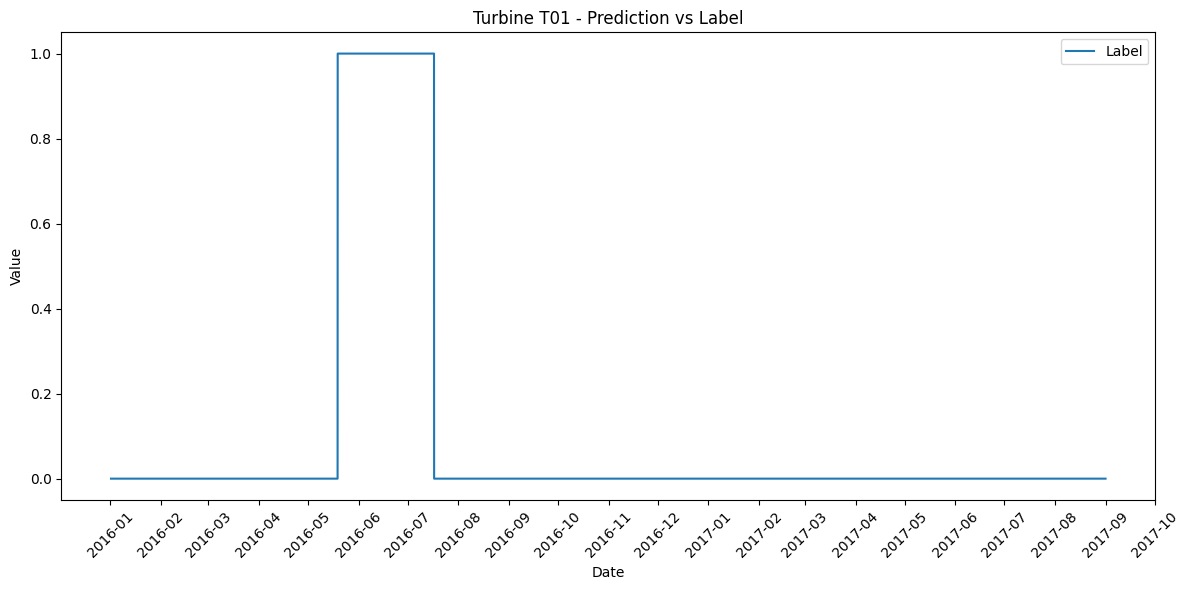

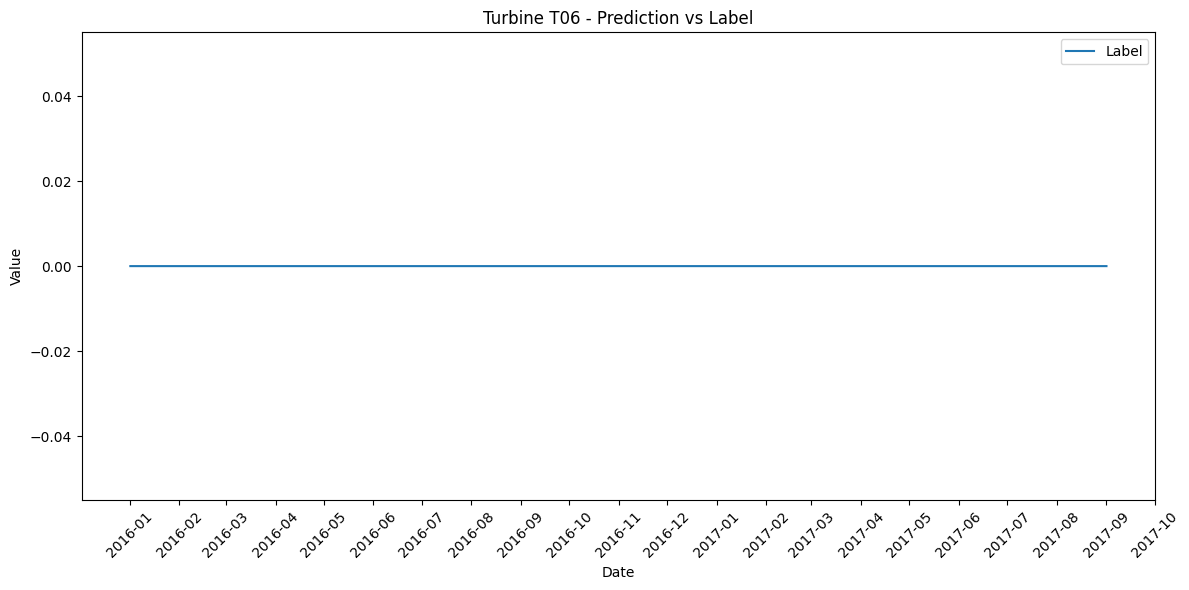

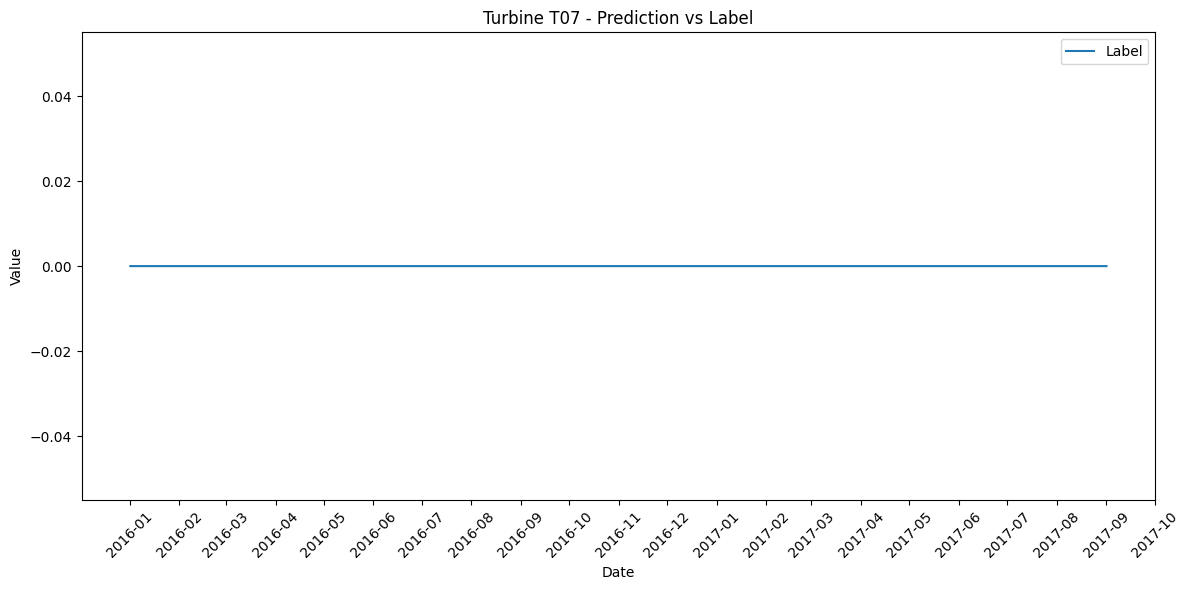

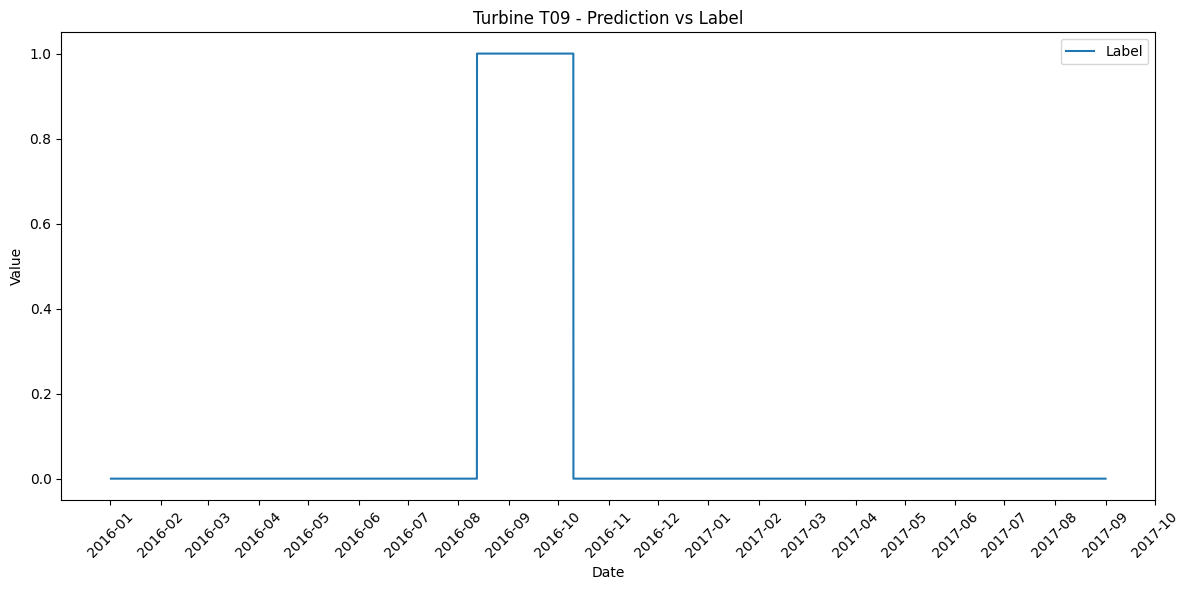

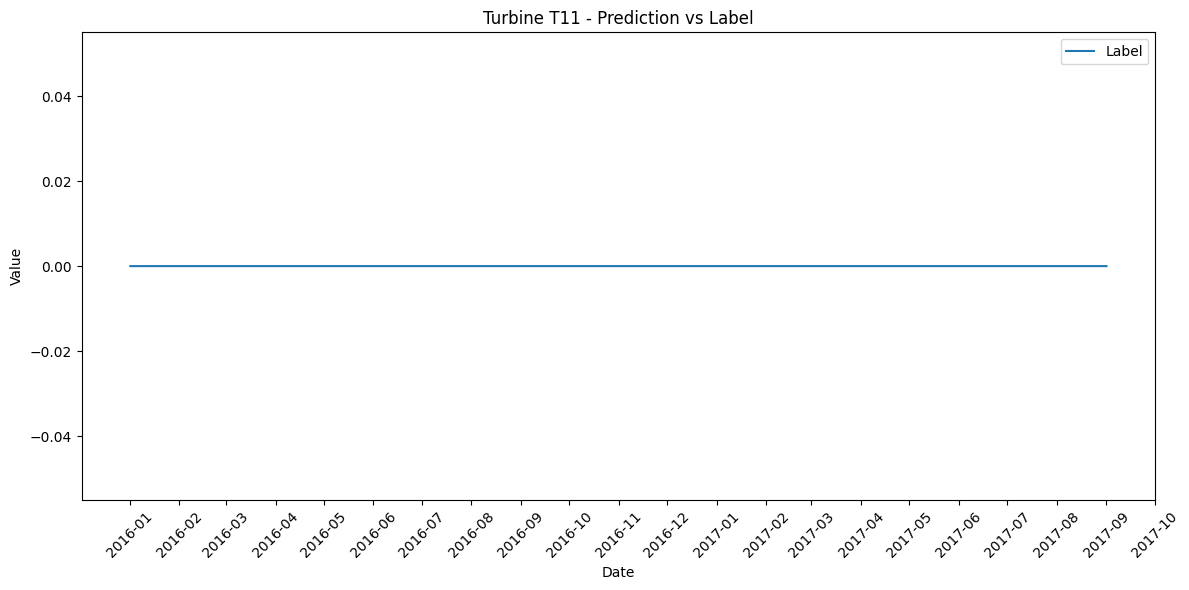

In [45]:
labels_df = create_labels_dataframe_all(signals_filled, y_signal, window_size=64)
plot_all_labels(labels_df)

In [15]:
X_train_signal, y_train_signal, X_val_signal, y_val_signal, X_train_metmast, X_val_metmast = split_data(X_signal, y_signal, X_metmast, num_parts=5)

In [16]:
train_signal_dataset = SignalDataset(X_train_signal, y_train_signal)
val_signal_dataset = SignalDataset(X_val_signal, y_val_signal)

train_metmast_dataset = MetmastDataset(X_train_metmast)
val_metmast_dataset = MetmastDataset(X_val_metmast)

In [61]:
print(f"The dimension of signal features data: {X_signal.shape}")
print(f"The dimension of metmast features data: {X_metmast.shape}")
print(f"The dimension of labels data: {y_signal.shape}")
print(f"The dimension of signal features training data: {X_train_signal.shape}")
print(f"The dimension of metmast features training data: {X_train_metmast.shape}")
print(f"The dimension of training labels data: {y_train_signal.shape}")
print(f"The dimension of signal features validation data: {X_val_signal.shape}")
print(f"The dimension of metmast features validation data: {X_val_metmast.shape}")
print(f"The dimension of validation labels data: {y_val_signal.shape}")

The dimension of signal features data: (436395, 64, 81)
The dimension of metmast features data: (436395, 64, 40)
The dimension of labels data: (436395,)
The dimension of signal features training data: (349115, 64, 81)
The dimension of metmast features training data: (349115, 64, 40)
The dimension of training labels data: (349115,)
The dimension of signal features validation data: (87280, 64, 81)
The dimension of metmast features validation data: (87280, 64, 40)
The dimension of validation labels data: (87280,)


This cell contains utility functions for training and evaluating PyTorch models for predictive maintenance tasks.

### Function: `train_model`
- This function trains a PyTorch model for a specified number of epochs.
- It takes model, training and validation datasets, optimizer, loss criterion, number of epochs, batch size, device, and other parameters as input.
- The training loop iterates over epochs and batches, computing the loss, performing backpropagation, and updating model parameters.
- Early stopping is implemented to monitor validation loss and stop training if there is no improvement after a specified number of epochs.
- The best model parameters are saved, and the trained model is returned.
- Parameters:
  - `model`: PyTorch model to be trained.
  - `train_signal_dataset`: Dataset for signal data in the training set.
  - `train_metmast_dataset`: Dataset for meteorological mast data in the training set.
  - `val_signal_dataset`: Dataset for signal data in the validation set.
  - `val_metmast_dataset`: Dataset for meteorological mast data in the validation set.
  - `desc`: Description or name of the model.
  - `optimizer`: Optimizer for updating model parameters.
  - `criterion`: Loss criterion for computing the loss.
  - `num_epochs`: Number of epochs for training.
  - `batch_size`: Batch size for training.
  - `device`: Device for computation (e.g., 'cuda' for GPU or 'cpu').
  - `clip_value`: Gradient clipping value to prevent exploding gradients (default is 1.0).
  - `patience`: Number of epochs to wait for improvement in validation loss before early stopping (default is 10).
- Returns:
  - Trained PyTorch model.

### Function: `evaluate_model`
- This function evaluates a trained PyTorch model on a validation dataset.
- It computes the loss for the validation dataset and returns the average loss.
- Parameters:
  - `model`: Trained PyTorch model to be evaluated.
  - `signal_loader`: DataLoader for signal data in the validation set.
  - `metmast_loader`: DataLoader for meteorological mast data in the validation set.
  - `criterion`: Loss criterion for computing the loss.
  - `device`: Device for computation (e.g., 'cuda' for GPU or 'cpu').
- Returns:
  - Average validation loss.

These functions are essential for training and evaluating models efficiently, enabling iterative improvement and tuning of model parameters.


In [3]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm


def train_model(model, train_signal_dataset, train_metmast_dataset, val_signal_dataset, val_metmast_dataset, desc, optimizer, criterion, num_epochs, batch_size, device, clip_value=1.0, patience=10):
    
    if not os.path.exists("Model/"):
        os.makedirs("Model/")

    model_file_path = f"Model/{desc}.pt"
    
    if os.path.exists(model_file_path):
        print(f"Loading existing model from {model_file_path}")
        model.load_state_dict(torch.load(model_file_path))
    else:
        print(f"Training new model and saving to {model_file_path}")
    
    train_signal_loader = DataLoader(train_signal_dataset, batch_size=batch_size, shuffle=True)
    train_metmast_loader = DataLoader(train_metmast_dataset, batch_size=batch_size, shuffle=True)
    val_signal_loader = DataLoader(val_signal_dataset, batch_size=batch_size, shuffle=False)
    val_metmast_loader = DataLoader(val_metmast_dataset, batch_size=batch_size, shuffle=False)

    best_loss = float('inf')
    best_model = None
    epochs_without_improvement = 0

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        progress_bar = tqdm(zip(train_signal_loader, train_metmast_loader), desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch", total=len(train_signal_loader))
        # progress_bar = tqdm(zip(train_signal_loader, train_metmast_loader), desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch", total=5)
        # batch_counter = 0  # Initialize a counter for the batches

        for (signal_batch, label_batch), metmast_batch in progress_bar:
            # if batch_counter >= 5:  # Break after processing 5 batches
            #     break
            # batch_counter += 1
            
            signal_batch = signal_batch.to(device).float()
            metmast_batch = metmast_batch.to(device).float()
            label_batch = label_batch.to(device).float()

            optimizer.zero_grad()
            outputs = model(signal_batch, metmast_batch)
            loss = criterion(outputs, label_batch)
            loss.backward()
            nn.utils.clip_grad_value_(model.parameters(), clip_value)
            optimizer.step()

            train_loss += loss.item()
            progress_bar.set_postfix({"Loss": loss.item()})

        train_loss /= len(train_signal_loader)

        val_loss = evaluate_model(model, val_signal_loader, val_metmast_loader, criterion, device)

        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        if val_loss < best_loss:
            best_loss = val_loss
            best_model = model.state_dict()
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
            print(f'EarlyStopping counter: {epochs_without_improvement} out of {patience}')

        if epochs_without_improvement >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    model.load_state_dict(best_model)
    torch.save(model.state_dict(), model_file_path)

    return model


def evaluate_model(model, signal_loader, metmast_loader, criterion, device):
    model.eval()
    val_loss = 0.0
    
    # Initialize the progress bar
    progress_bar = tqdm(zip(signal_loader, metmast_loader), desc="Evaluating", unit="batch", total=len(signal_loader))
    
    with torch.no_grad():
        for (signal_batch, label_batch), metmast_batch in progress_bar:
            signal_batch = signal_batch.to(device).float()
            metmast_batch = metmast_batch.to(device).float()
            label_batch = label_batch.to(device).float()

            outputs = model(signal_batch, metmast_batch)
            loss = criterion(outputs, label_batch)
            val_loss += loss.item()
            
            # Update the progress bar with the current loss
            progress_bar.set_postfix({"Loss": loss.item()})

    val_loss /= len(signal_loader)
    return val_loss

This cell contains the implementation of the Anomaly Transformer model and related modules for anomaly detection in time series data.

### Modules:
1. **PositionalEmbedding**: Computes positional encodings for input sequences based on their positions in the sequence.
2. **TokenEmbedding**: Generates token embeddings for input sequences using convolutional operations.
3. **DataEmbedding**: Combines token embeddings with positional embeddings for input sequences.
4. **EncoderLayer**: A single layer of the Transformer encoder, consisting of self-attention and feed-forward neural network modules.
5. **Encoder**: Stacks multiple encoder layers to form the Transformer encoder.
6. **DualInputEncoder**: Accepts two input sequences (e.g., signal and meteorological data), embeds them separately, and then encodes them using a shared Transformer encoder.
7. **AnomalyTransformer**: The main model that integrates signal and meteorological data using the DualInputEncoder. It also includes attention-based pooling and output projection layers.
8. **TriangularCausalMask**: Creates a causal mask for attention mechanism, preventing information flow from future time steps.
9. **AnomalyAttention**: Custom attention mechanism for capturing temporal dependencies in the data. It incorporates distances between sequence elements and learns attention weights using scaled dot-product attention.
10. **AttentionLayer**: Combines the inner attention mechanism with projection layers to generate output representations.

These modules collectively form the Anomaly Transformer model, which is designed for anomaly detection tasks in time series data with both signal and auxiliary information.


In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
from math import sqrt


class PositionalEmbedding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEmbedding, self).__init__()
        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model).float().cuda()
        pe.require_grad = False

        position = torch.arange(0, max_len).float().unsqueeze(1).cuda()
        div_term = (torch.arange(0, d_model, 2).float().cuda() * -(math.log(10000.0) / d_model)).exp()

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return self.pe[:, :x.size(1)]


class TokenEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(TokenEmbedding, self).__init__()
        padding = 1 if torch.__version__ >= '1.5.0' else 2
        self.tokenConv = nn.Conv1d(in_channels=c_in, out_channels=d_model,
                                   kernel_size=3, padding=padding, padding_mode='circular', bias=False)
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='leaky_relu')

    def forward(self, x):
        x = self.tokenConv(x.permute(0, 2, 1)).transpose(1, 2)
        return x


class DataEmbedding(nn.Module):
    def __init__(self, c_in, d_model, dropout=0.0):
        super(DataEmbedding, self).__init__()

        self.value_embedding = TokenEmbedding(c_in=c_in, d_model=d_model)
        self.position_embedding = PositionalEmbedding(d_model=d_model)

        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x):
        x = self.value_embedding(x) + self.position_embedding(x)
        return self.dropout(x)


class EncoderLayer(nn.Module):
    def __init__(self, attention, d_model, d_ff=None, dropout=0.1, activation="relu"):
        super(EncoderLayer, self).__init__()
        d_ff = d_ff or 4 * d_model
        self.attention = attention
        self.conv1 = nn.Conv1d(in_channels=d_model, out_channels=d_ff, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=d_ff, out_channels=d_model, kernel_size=1)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        self.activation = F.relu if activation == "relu" else F.gelu

    def forward(self, x, attn_mask=None):
        new_x, attn, mask, sigma = self.attention(
            x, x, x,
            attn_mask=attn_mask
        )
        x = x + self.dropout(new_x)
        y = x = self.norm1(x)
        y = self.dropout(self.activation(self.conv1(y.transpose(-1, 1))))
        y = self.dropout(self.conv2(y).transpose(-1, 1))

        return self.norm2(x + y), attn, mask, sigma

class Encoder(nn.Module):
    def __init__(self, attn_layers, norm_layer=None):
        super(Encoder, self).__init__()
        self.attn_layers = nn.ModuleList(attn_layers)
        self.norm = norm_layer

    def forward(self, x, attn_mask=None):
        # x [B, L, D]
        series_list = []
        prior_list = []
        sigma_list = []
        for attn_layer in self.attn_layers:
            x, series, prior, sigma = attn_layer(x, attn_mask=attn_mask)
            series_list.append(series)
            prior_list.append(prior)
            sigma_list.append(sigma)

        if self.norm is not None:
            x = self.norm(x)

        return x, series_list, prior_list, sigma_list

class DualInputEncoder(nn.Module):
    def __init__(self, win_size, signal_embedding, metmast_embedding, d_model, n_heads, e_layers, d_ff, dropout, activation):
        super(DualInputEncoder, self).__init__()
        self.signal_embedding = signal_embedding
        self.metmast_embedding = metmast_embedding
        self.fc = nn.Linear(2 * win_size, win_size)
        self.encoder = Encoder(
            [
                EncoderLayer(
                    AttentionLayer(
                        AnomalyAttention(win_size, False, attention_dropout=dropout, output_attention=True),
                        d_model, n_heads),
                    d_model,
                    d_ff,
                    dropout=dropout,
                    activation=activation
                ) for _ in range(e_layers)
            ],
            norm_layer=torch.nn.LayerNorm(d_model)
        )

    def forward(self, signal, metmast):
        # signal: [B, T_signal, F_signal]
        # metmast: [B, T_metmast, F_metmast]
        signal_enc = self.signal_embedding(signal)  # [B, T_signal, d_model]
        metmast_enc = self.metmast_embedding(metmast)  # [B, T_metmast, d_model]
        enc_out = torch.cat((signal_enc, metmast_enc), dim=1)  # [B, T_signal + T_metmast, d_model]
        enc_out = enc_out.permute(0, 2, 1)
        enc_out = self.fc(enc_out)
        enc_out = enc_out.permute(0, 2, 1)
        enc_out, _, _, _ = self.encoder(enc_out)  # [B, T_signal + T_metmast, d_model]
        return enc_out

class AnomalyTransformer(nn.Module):
    def __init__(self, win_size, signal_enc_in, metmast_enc_in, c_out, d_model=512, n_heads=8, e_layers=3, d_ff=512,
                 dropout=0.0, activation='gelu'):
        super(AnomalyTransformer, self).__init__()

        # Encoding
        self.signal_embedding = DataEmbedding(signal_enc_in, d_model, dropout)
        self.metmast_embedding = DataEmbedding(metmast_enc_in, d_model, dropout)

        # Dual Input Encoder
        self.dual_input_encoder = DualInputEncoder(win_size, self.signal_embedding, self.metmast_embedding, d_model, n_heads, e_layers, d_ff, dropout, activation)

        # Attention-based pooling
        self.attention_pool = nn.Linear(d_model, 1)

        # Output projection
        self.projection = nn.Linear(d_model, c_out, bias=True)

        self.name = "AnomalyTransformer"

    def forward(self, signal, metmast):
        # signal: [B, T_signal, F_signal]
        # metmast: [B, T_metmast, F_metmast]
        enc_out = self.dual_input_encoder(signal, metmast)  # [B, T_signal + T_metmast, d_model]

        # Attention-based pooling
        attention_weights = torch.softmax(self.attention_pool(enc_out), dim=1)  # [B, T_signal + T_metmast, 1]
        pooled_out = torch.sum(enc_out * attention_weights, dim=1)  # [B, d_model]

        # Output projection
        output = self.projection(pooled_out)  # [B, c_out]
        output = torch.softmax(output, dim=0)  # [B, c_out]

        return output.squeeze()
    

class TriangularCausalMask():
    def __init__(self, B, L, device="cpu"):
        mask_shape = [B, 1, L, L]
        with torch.no_grad():
            self._mask = torch.triu(torch.ones(mask_shape, dtype=torch.bool), diagonal=1).to(device)

    @property
    def mask(self):
        return self._mask


class AnomalyAttention(nn.Module):
    def __init__(self, win_size, mask_flag=True, scale=None, attention_dropout=0.0, output_attention=False):
        super(AnomalyAttention, self).__init__()
        self.scale = scale
        self.mask_flag = mask_flag
        self.output_attention = output_attention
        self.dropout = nn.Dropout(attention_dropout)
        window_size = win_size
        self.distances = torch.zeros((window_size, window_size)).cuda()
        for i in range(window_size):
            for j in range(window_size):
                self.distances[i][j] = abs(i - j)

    def forward(self, queries, keys, values, sigma, attn_mask):
        B, L, H, E = queries.shape
        _, S, _, D = values.shape
        scale = self.scale or 1. / sqrt(E)

        scores = torch.einsum("blhe,bshe->bhls", queries, keys)
        if self.mask_flag:
            if attn_mask is None:
                attn_mask = TriangularCausalMask(B, L, device=queries.device)
            scores.masked_fill_(attn_mask.mask, -np.inf)
        attn = scale * scores

        sigma = sigma.transpose(1, 2)  # B L H ->  B H L
        window_size = attn.shape[-1]
        sigma = torch.sigmoid(sigma * 5) + 1e-5
        sigma = torch.pow(3, sigma) - 1
        sigma = sigma.unsqueeze(-1).repeat(1, 1, 1, window_size)  # B H L L
        prior = self.distances.unsqueeze(0).unsqueeze(0).repeat(sigma.shape[0], sigma.shape[1], 1, 1).cuda()
        prior = 1.0 / (math.sqrt(2 * math.pi) * sigma) * torch.exp(-prior ** 2 / 2 / (sigma ** 2))

        series = self.dropout(torch.softmax(attn, dim=-1))
        V = torch.einsum("bhls,bshd->blhd", series, values)

        if self.output_attention:
            return (V.contiguous(), series, prior, sigma)
        else:
            return (V.contiguous(), None)


class AttentionLayer(nn.Module):
    def __init__(self, attention, d_model, n_heads, d_keys=None,
                 d_values=None):
        super(AttentionLayer, self).__init__()

        d_keys = d_keys or (d_model // n_heads)
        d_values = d_values or (d_model // n_heads)
        self.norm = nn.LayerNorm(d_model)
        self.inner_attention = attention
        self.query_projection = nn.Linear(d_model,
                                          d_keys * n_heads)
        self.key_projection = nn.Linear(d_model,
                                        d_keys * n_heads)
        self.value_projection = nn.Linear(d_model,
                                          d_values * n_heads)
        self.sigma_projection = nn.Linear(d_model,
                                          n_heads)
        self.out_projection = nn.Linear(d_values * n_heads, d_model)

        self.n_heads = n_heads

    def forward(self, queries, keys, values, attn_mask):
        B, L, _ = queries.shape
        _, S, _ = keys.shape
        H = self.n_heads
        x = queries
        queries = self.query_projection(queries).view(B, L, H, -1)
        keys = self.key_projection(keys).view(B, S, H, -1)
        values = self.value_projection(values).view(B, S, H, -1)
        sigma = self.sigma_projection(x).view(B, L, H)

        out, series, prior, sigma = self.inner_attention(
            queries,
            keys,
            values,
            sigma,
            attn_mask
        )
        out = out.view(B, L, -1)

        return self.out_projection(out), series, prior, sigma

In [48]:
window_size = 64  # Replace with the appropriate window size

model = AnomalyTransformer(
    signal_enc_in=81,
    metmast_enc_in=40,
    c_out=1,
    dropout=0.1,
    win_size=window_size  # Pass the window_size as an integer
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
# criterion = nn.MSELoss()
criterion = nn.BCELoss()

desc = f"{model.name}_{turbine_id}_{component}"

trained_model = train_model(model, train_signal_dataset, train_metmast_dataset, val_signal_dataset, val_metmast_dataset, desc, optimizer, criterion, num_epochs=100, batch_size=128, device=device, clip_value=5.0, patience=2)

Training new model and saving to Model/AnomalyTransformer_all_GEARBOX.pt


Evaluating: 100%|██████████| 682/682 [00:29<00:00, 22.95batch/s, Loss=0.009]  


Epoch 1/100 - Train Loss: 0.2144, Val Loss: 0.0079


Evaluating: 100%|██████████| 682/682 [00:15<00:00, 43.28batch/s, Loss=0.00905]


Epoch 2/100 - Train Loss: 0.1925, Val Loss: 0.0079
EarlyStopping counter: 1 out of 2


Evaluating: 100%|██████████| 682/682 [00:08<00:00, 76.76batch/s, Loss=0.00923]


Epoch 3/100 - Train Loss: 0.1798, Val Loss: 0.0080
EarlyStopping counter: 2 out of 2
Early stopping at epoch 3


This `DualInputLSTM` class is a PyTorch module that implements a model for time series forecasting with two input streams (signal and meteorological data). Below is the breakdown of its components:

- **Input Processing**:
  - It starts by normalizing the input data using batch normalization (`nn.BatchNorm1d`) separately for signal and meteorological data.
  - The input sequences are permuted to the format expected by the LSTM layers.

- **LSTM Layers**:
  - Two LSTM layers are used, one for processing signal data and the other for meteorological data.
  - Each LSTM layer processes its respective input sequence and produces output sequences.

- **Concatenation**:
  - The final hidden states of the LSTM layers are concatenated along the feature dimension (`dim=1`). This combines the information from both input streams.

- **Fully Connected Layer (FC)**:
  - The concatenated output is passed through a fully connected layer (`fc`) to reduce the dimensionality.

- **Attention-based Pooling**:
  - The output of the FC layer is multiplied element-wise with attention weights computed by another linear layer (`attention_pool`), followed by a softmax operation.
  - This applies attention-based pooling to focus on relevant parts of the input sequence.

- **Output Layer**:
  - The pooled output is passed through another fully connected layer (`fc_out`) to produce the final output.
  - If the `output_size` is not 1, batch normalization is applied before the output layer.

- **Activation**:
  - The sigmoid activation function is applied to the output if `output_size` is not 1, ensuring that the output values are within the range [0, 1].

- **Batch Processing**:
  - The model is designed to process batches of input sequences efficiently.

This model architecture enables the joint learning of temporal dependencies from both signal and meteorological data for time series forecasting tasks.

In [19]:
from __future__ import division
from __future__ import print_function
import torch.nn as nn

class DualInputLSTM(nn.Module):
    def __init__(self, signal_input_size=6, metmast_input_size=4, hidden_size=64, output_size=10, num_layers=2, dropout=0.0):
        super().__init__()
        
        self.signal_rnn = nn.LSTM(
            input_size=signal_input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout,
        )
        
        self.metmast_rnn = nn.LSTM(
            input_size=metmast_input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout,
        )
        
        self.fc = nn.Linear(2 * hidden_size, hidden_size)
        self.attention_pool = nn.Linear(hidden_size, 1)
        self.fc_out = nn.Linear(hidden_size, output_size)
        
        self.signal_norm = nn.BatchNorm1d(signal_input_size)
        self.metmast_norm = nn.BatchNorm1d(metmast_input_size)
        
        if output_size != 1:
            self.output_norm = nn.BatchNorm1d(output_size)
        
        self.signal_input_size = signal_input_size
        self.metmast_input_size = metmast_input_size
        self.output_size = output_size
        self.name = 'DualInputLSTM'
    
    def forward(self, signal, metmast):
        # signal: [B, T_signal, F_signal]
        # metmast: [B, T_metmast, F_metmast]
        signal = signal.permute(0, 2, 1)  # [B, F_signal, T_signal]
        metmast = metmast.permute(0, 2, 1)  # [B, F_metmast, T_metmast]
        
        signal = self.signal_norm(signal)  # [B, F_signal, T_signal]
        metmast = self.metmast_norm(metmast)  # [B, F_metmast, T_metmast]
        
        signal = signal.permute(0, 2, 1)  # [B, T_signal, F_signal]
        metmast = metmast.permute(0, 2, 1)  # [B, T_metmast, F_metmast]
        
        signal_out, _ = self.signal_rnn(signal)  # [B, T_signal, hidden_size]
        metmast_out, _ = self.metmast_rnn(metmast)  # [B, T_metmast, hidden_size]
        
        out = torch.cat((signal_out[:, -1, :], metmast_out[:, -1, :]), dim=1)  # [B, 2 * hidden_size]
        out = self.fc(out)  # [B, hidden_size]
        
        attention_weights = torch.softmax(self.attention_pool(out), dim=1)  # [B, 1]
        pooled_out = out * attention_weights  # [B, hidden_size]        
        out = self.fc_out(pooled_out).squeeze()  # [B, output_size]
        
        if self.output_size != 1:
            out = self.output_norm(out)  # [B, output_size]
        
        out = torch.sigmoid(out)  # [B, output_size]
        
        return out

In [49]:
window_size = 60  # Replace with the appropriate window size

model = DualInputLSTM(
    signal_input_size=81,
    metmast_input_size=40,
    hidden_size=64,
    output_size=1,
    num_layers=5,
    dropout=0.1,
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
# criterion = nn.MSELoss()
criterion = nn.BCELoss()

desc = f"{model.name}_{turbine_id}_{component}"

trained_model = train_model(model, train_signal_dataset, train_metmast_dataset, val_signal_dataset, val_metmast_dataset, desc, optimizer, criterion, num_epochs=100, batch_size=1024, device=device, clip_value=5.0, patience=2)

Training new model and saving to Model/DualInputLSTM_all_GEARBOX.pt


Epoch 1/100:   0%|          | 0/341 [00:00<?, ?batch/s]

Evaluating: 100%|██████████| 86/86 [00:16<00:00,  5.33batch/s, Loss=0.0627]


Epoch 1/100 - Train Loss: 0.2842, Val Loss: 0.0558


Evaluating: 100%|██████████| 86/86 [00:02<00:00, 31.25batch/s, Loss=0.0656]


Epoch 2/100 - Train Loss: 0.1872, Val Loss: 0.0693
EarlyStopping counter: 1 out of 2


Evaluating: 100%|██████████| 86/86 [00:02<00:00, 30.22batch/s, Loss=0.0362]


Epoch 3/100 - Train Loss: 0.1740, Val Loss: 0.0851
EarlyStopping counter: 2 out of 2
Early stopping at epoch 3


The `DualInputALSTM` class is a PyTorch module that implements a model for time series forecasting with two input streams (signal and meteorological data) and attention mechanism for feature selection. Below is the breakdown of its components:

- **Input Processing**:
  - The input sequences are permuted to the format expected by the LSTM layers.
  - Batch normalization is applied separately for signal and meteorological data.

- **Signal and Metmast Networks**:
  - Each input stream (signal and metmast) is processed using a linear layer followed by a tanh activation function.
  - The output of each network is fed into separate LSTM layers.

- **Attention Mechanism**:
  - An attention network is applied to both the signal and meteorological data outputs from the LSTM layers.
  - The attention mechanism computes attention scores for each time step of the input sequences.
  - The attention scores are used to weight the output of the LSTM layers before pooling.

- **Pooling**:
  - Weighted outputs from the LSTM layers are pooled across time steps to generate a single representation for each input stream.
  - The pooled representations are concatenated along the feature dimension.

- **Fully Connected Layer (FC)**:
  - The concatenated representation is passed through a fully connected layer to reduce the dimensionality.

- **Output Layer**:
  - The output of the FC layer is passed through another fully connected layer to produce the final output.
  - If the output size is not 1, batch normalization is applied before the output layer.

- **Activation**:
  - The sigmoid activation function is applied to the output if the output size is not 1, ensuring that the output values are within the range [0, 1].

- **Batch Processing**:
  - The model is designed to process batches of input sequences efficiently.

This model architecture enables the joint learning of temporal dependencies from both signal and meteorological data while incorporating an attention mechanism for feature selection.

In [4]:
import torch
import torch.nn as nn

class DualInputALSTM(nn.Module):
    def __init__(self, signal_input_size=6, metmast_input_size=4, hidden_size=64, output_size=10, num_layers=2, dropout=0.0, rnn_type="GRU"):
        super().__init__()
        self.name = 'DualInputALSTM'
        self.hid_size = hidden_size
        self.signal_input_size = signal_input_size
        self.metmast_input_size = metmast_input_size
        self.output_size = output_size
        self.dropout = dropout
        self.rnn_type = rnn_type
        self.rnn_layer = num_layers
        self._build_model()
    
    def _build_model(self):
        try:
            klass = getattr(nn, self.rnn_type.upper())
        except Exception as e:
            raise ValueError("unknown rnn_type `%s`" % self.rnn_type) from e
        
        self.signal_net = nn.Sequential()
        self.signal_net.add_module("fc_in", nn.Linear(in_features=self.signal_input_size, out_features=self.hid_size))
        self.signal_net.add_module("act", nn.Tanh())
        
        self.metmast_net = nn.Sequential()
        self.metmast_net.add_module("fc_in", nn.Linear(in_features=self.metmast_input_size, out_features=self.hid_size))
        self.metmast_net.add_module("act", nn.Tanh())
        
        self.signal_rnn = klass(
            input_size=self.hid_size,
            hidden_size=self.hid_size,
            num_layers=self.rnn_layer,
            batch_first=True,
            dropout=self.dropout,
        )
        
        self.metmast_rnn = klass(
            input_size=self.hid_size,
            hidden_size=self.hid_size,
            num_layers=self.rnn_layer,
            batch_first=True,
            dropout=self.dropout,
        )
        
        self.fc = nn.Linear(2 * self.hid_size, self.hid_size)
        self.fc_out = nn.Linear(in_features=self.hid_size, out_features=self.output_size)
        
        self.signal_norm = nn.BatchNorm1d(self.signal_input_size)
        self.metmast_norm = nn.BatchNorm1d(self.metmast_input_size)
        
        if self.output_size != 1:
            self.output_norm = nn.BatchNorm1d(self.output_size)
        
        self.att_net = nn.Sequential()
        self.att_net.add_module(
            "att_fc_in", nn.Linear(in_features=self.hid_size, out_features=int(self.hid_size / 2)),
        )
        self.att_net.add_module("att_dropout", torch.nn.Dropout(self.dropout))
        self.att_net.add_module("att_act", nn.Tanh())
        self.att_net.add_module(
            "att_fc_out", nn.Linear(in_features=int(self.hid_size / 2), out_features=1, bias=False),
        )
        self.att_net.add_module("att_softmax", nn.Softmax(dim=1))
    
    def forward(self, signal, metmast):
        # signal: [B, T_signal, F_signal]
        # metmast: [B, T_metmast, F_metmast]
        signal = signal.permute(0, 2, 1)  # [B, F_signal, T_signal]
        metmast = metmast.permute(0, 2, 1)  # [B, F_metmast, T_metmast]
        
        signal_norm = self.signal_norm(signal)  # [B, F_signal, T_signal]
        metmast_norm = self.metmast_norm(metmast)  # [B, F_metmast, T_metmast]
        
        signal_norm = signal_norm.permute(0, 2, 1)  # [B, T_signal, F_signal]
        metmast_norm = metmast_norm.permute(0, 2, 1)  # [B, T_metmast, F_metmast]
        
        signal_rnn_out, _ = self.signal_rnn(self.signal_net(signal_norm))  # [B, T_signal, hid_size]
        metmast_rnn_out, _ = self.metmast_rnn(self.metmast_net(metmast_norm))  # [B, T_metmast, hid_size]
        
        signal_att_score = self.att_net(signal_rnn_out)  # [B, T_signal, 1]
        metmast_att_score = self.att_net(metmast_rnn_out)  # [B, T_metmast, 1]
        
        signal_out_att = torch.mul(signal_rnn_out, signal_att_score)  # [B, T_signal, hid_size]
        metmast_out_att = torch.mul(metmast_rnn_out, metmast_att_score)  # [B, T_metmast, hid_size]
        
        signal_out_att = torch.sum(signal_out_att, dim=1)  # [B, hid_size]
        metmast_out_att = torch.sum(metmast_out_att, dim=1)  # [B, hid_size]
        
        out = torch.cat((signal_out_att, metmast_out_att), dim=1)  # [B, 2 * hid_size]
        out = self.fc(out)  # [B, hid_size]
        out = self.fc_out(out)  # [B, output_size]
        out = out.squeeze()  # [B]
        
        if self.output_size != 1:
            out = self.output_norm(out)  # [B, output_size]
        
        out = torch.sigmoid(out)  # [B, output_size]
        
        return out

In [50]:
window_size = 60  # Replace with the appropriate window size

model = DualInputALSTM(
    signal_input_size=81,
    metmast_input_size=40,
    hidden_size=64,
    output_size=1,
    num_layers=5,
    dropout=0.1,
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
# criterion = nn.MSELoss()
criterion = nn.BCELoss()

desc = f"{model.name}_{turbine_id}_{component}"

trained_model = train_model(model, train_signal_dataset, train_metmast_dataset, val_signal_dataset, val_metmast_dataset, desc, optimizer, criterion, num_epochs=100, batch_size=1024, device=device, clip_value=5.0, patience=2)

Training new model and saving to Model/DualInputALSTM_all_GEARBOX.pt


Epoch 1/100:   0%|          | 0/341 [00:00<?, ?batch/s]

Evaluating: 100%|██████████| 86/86 [00:08<00:00,  9.66batch/s, Loss=0.0592]


Epoch 1/100 - Train Loss: 0.2437, Val Loss: 0.0672


Evaluating: 100%|██████████| 86/86 [00:02<00:00, 30.36batch/s, Loss=0.0292]


Epoch 2/100 - Train Loss: 0.1785, Val Loss: 0.0741
EarlyStopping counter: 1 out of 2


Evaluating: 100%|██████████| 86/86 [00:10<00:00,  8.59batch/s, Loss=0.015] 

Epoch 3/100 - Train Loss: 0.1639, Val Loss: 0.0802
EarlyStopping counter: 2 out of 2
Early stopping at epoch 3


The `DualInputSFMModel` class is a PyTorch module that implements a model for time series forecasting with two input streams (signal and meteorological data) using the Spectral Feature Mapping (SFM) technique. Below is the breakdown of its components:

- **Input Layers**:
  - Separate linear layers are used for processing signal and meteorological input data.
  - Each input layer consists of trainable weight matrices for different components of the SFM model.

- **Shared Layers**:
  - Common weight matrices are used for processing both signal and meteorological data.
  - These weight matrices are parameterized and initialized using orthogonal and Xavier initialization techniques.

- **Attention Mechanism**:
  - The SFM model incorporates an attention mechanism to select relevant features from the input data.
  - Attention scores are computed based on the inner product of input features and learned weight matrices.

- **Temporal Dynamics**:
  - The SFM model captures temporal dependencies using an iterative approach over time steps.
  - At each time step, the model updates its internal states based on input features and previous states.

- **Output Layer**:
  - The final output is obtained by passing the internal states through a linear layer.
  - Optionally, a fully connected layer can be added after the output layer for further processing.

- **Activation Functions**:
  - The model uses hyperbolic tangent (tanh) and hard sigmoid activation functions for non-linearity.

- **Dropout**:
  - Dropout regularization can be applied to the weight matrices of the SFM model to prevent overfitting.

- **Initialization**:
  - Weight matrices and other parameters are initialized using Xavier and orthogonal initialization techniques.

- **Batch Processing**:
  - The model is designed to process batches of input sequences efficiently.

The SFM model architecture enables the joint learning of temporal dependencies from both signal and meteorological data while leveraging spectral features for improved forecasting performance.

In [20]:
from torch.nn import init


class DualInputSFMModel(nn.Module):
    def __init__(
        self,
        signal_dim=6,
        metmast_dim=4,
        output_dim=1,
        freq_dim=10,
        hidden_size=64,
        dropout_W=0.0,
        dropout_U=0.0,
    ):
        super().__init__()

        self.name = 'DualInputSFM'
        self.signal_dim = signal_dim
        self.metmast_dim = metmast_dim
        self.output_dim = output_dim
        self.freq_dim = freq_dim
        self.hidden_dim = hidden_size
        # self.device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
        self.device = device

        # Signal input layers
        self.W_i_signal = nn.Parameter(init.xavier_uniform_(torch.empty((self.signal_dim, self.hidden_dim))))
        self.W_ste_signal = nn.Parameter(init.xavier_uniform_(torch.empty(self.signal_dim, self.hidden_dim)))
        self.W_fre_signal = nn.Parameter(init.xavier_uniform_(torch.empty(self.signal_dim, self.freq_dim)))
        self.W_c_signal = nn.Parameter(init.xavier_uniform_(torch.empty(self.signal_dim, self.hidden_dim)))
        self.W_o_signal = nn.Parameter(init.xavier_uniform_(torch.empty(self.signal_dim, self.hidden_dim)))

        # Metmast input layers
        self.W_i_metmast = nn.Parameter(init.xavier_uniform_(torch.empty((self.metmast_dim, self.hidden_dim))))
        self.W_ste_metmast = nn.Parameter(init.xavier_uniform_(torch.empty(self.metmast_dim, self.hidden_dim)))
        self.W_fre_metmast = nn.Parameter(init.xavier_uniform_(torch.empty(self.metmast_dim, self.freq_dim)))
        self.W_c_metmast = nn.Parameter(init.xavier_uniform_(torch.empty(self.metmast_dim, self.hidden_dim)))
        self.W_o_metmast = nn.Parameter(init.xavier_uniform_(torch.empty(self.metmast_dim, self.hidden_dim)))

        # Shared layers
        self.U_i = nn.Parameter(init.orthogonal_(torch.empty(self.hidden_dim, self.hidden_dim)))
        self.b_i = nn.Parameter(torch.zeros(self.hidden_dim))

        self.U_ste = nn.Parameter(init.orthogonal_(torch.empty(self.hidden_dim, self.hidden_dim)))
        self.b_ste = nn.Parameter(torch.ones(self.hidden_dim))

        self.U_fre = nn.Parameter(init.orthogonal_(torch.empty(self.hidden_dim, self.freq_dim)))
        self.b_fre = nn.Parameter(torch.ones(self.freq_dim))

        self.U_c = nn.Parameter(init.orthogonal_(torch.empty(self.hidden_dim, self.hidden_dim)))
        self.b_c = nn.Parameter(torch.zeros(self.hidden_dim))

        self.U_o = nn.Parameter(init.orthogonal_(torch.empty(self.hidden_dim, self.hidden_dim)))
        self.b_o = nn.Parameter(torch.zeros(self.hidden_dim))

        self.U_a = nn.Parameter(init.orthogonal_(torch.empty(self.freq_dim, 1)))
        self.b_a = nn.Parameter(torch.zeros(self.hidden_dim))

        self.W_p = nn.Parameter(init.xavier_uniform_(torch.empty(self.hidden_dim, self.output_dim)))
        self.b_p = nn.Parameter(torch.zeros(self.output_dim))

        self.activation = nn.Tanh()
        self.inner_activation = nn.Hardsigmoid()
        self.dropout_W, self.dropout_U = (dropout_W, dropout_U)
        self.fc_out = nn.Linear(self.output_dim, self.output_dim)

        self.states = []

    def forward(self, signal, metmast):
        # signal: [N, T_signal, F_signal]
        # metmast: [N, T_metmast, F_metmast]
        signal = signal.permute(0, 2, 1)  # [N, F_signal, T_signal]
        metmast = metmast.permute(0, 2, 1)  # [N, F_metmast, T_metmast]

        time_step = max(signal.shape[2], metmast.shape[2])

        for ts in range(time_step):
            if ts < signal.shape[2]:
                x_signal = signal[:, :, ts]
            else:
                x_signal = torch.zeros((signal.shape[0], self.signal_dim)).to(self.device)

            if ts < metmast.shape[2]:
                x_metmast = metmast[:, :, ts]
            else:
                x_metmast = torch.zeros((metmast.shape[0], self.metmast_dim)).to(self.device)

            if len(self.states) == 0:  # hasn't initialized yet
                self.init_states(x_signal, x_metmast)

            self.get_constants(x_signal, x_metmast)
            p_tm1 = self.states[0]
            h_tm1 = self.states[1]
            S_re_tm1 = self.states[2]
            S_im_tm1 = self.states[3]
            time_tm1 = self.states[4]
            B_U = self.states[5]
            B_W_signal = self.states[6]
            B_W_metmast = self.states[7]
            frequency = self.states[8]

            x_i_signal = torch.matmul(x_signal * B_W_signal[0], self.W_i_signal)
            x_ste_signal = torch.matmul(x_signal * B_W_signal[0], self.W_ste_signal)
            x_fre_signal = torch.matmul(x_signal * B_W_signal[0], self.W_fre_signal)
            x_c_signal = torch.matmul(x_signal * B_W_signal[0], self.W_c_signal)
            x_o_signal = torch.matmul(x_signal * B_W_signal[0], self.W_o_signal)

            x_i_metmast = torch.matmul(x_metmast * B_W_metmast[0], self.W_i_metmast)
            x_ste_metmast = torch.matmul(x_metmast * B_W_metmast[0], self.W_ste_metmast)
            x_fre_metmast = torch.matmul(x_metmast * B_W_metmast[0], self.W_fre_metmast)
            x_c_metmast = torch.matmul(x_metmast * B_W_metmast[0], self.W_c_metmast)
            x_o_metmast = torch.matmul(x_metmast * B_W_metmast[0], self.W_o_metmast)

            x_i = x_i_signal + x_i_metmast + self.b_i
            x_ste = x_ste_signal + x_ste_metmast + self.b_ste
            x_fre = x_fre_signal + x_fre_metmast + self.b_fre
            x_c = x_c_signal + x_c_metmast + self.b_c
            x_o = x_o_signal + x_o_metmast + self.b_o

            i = self.inner_activation(x_i + torch.matmul(h_tm1 * B_U[0], self.U_i))
            ste = self.inner_activation(x_ste + torch.matmul(h_tm1 * B_U[0], self.U_ste))
            fre = self.inner_activation(x_fre + torch.matmul(h_tm1 * B_U[0], self.U_fre))

            ste = torch.reshape(ste, (-1, self.hidden_dim, 1))
            fre = torch.reshape(fre, (-1, 1, self.freq_dim))

            f = ste * fre

            c = i * self.activation(x_c + torch.matmul(h_tm1 * B_U[0], self.U_c))

            time = time_tm1 + 1

            omega = torch.tensor(2 * np.pi) * time * frequency

            re = torch.cos(omega)
            im = torch.sin(omega)

            c = torch.reshape(c, (-1, self.hidden_dim, 1))

            S_re = f * S_re_tm1 + c * re
            S_im = f * S_im_tm1 + c * im

            A = torch.square(S_re) + torch.square(S_im)

            A = torch.reshape(A, (-1, self.freq_dim)).float()
            A_a = torch.matmul(A * B_U[0], self.U_a)
            A_a = torch.reshape(A_a, (-1, self.hidden_dim))
            a = self.activation(A_a + self.b_a)

            o = self.inner_activation(x_o + torch.matmul(h_tm1 * B_U[0], self.U_o))

            h = o * a
            p = torch.matmul(h, self.W_p) + self.b_p

            self.states = [p, h, S_re, S_im, time, None, None, None, None]

        self.states = []

        return torch.sigmoid(self.fc_out(p).squeeze())

    def init_states(self, x_signal, x_metmast):
        batch_size = x_signal.shape[0]
        reducer_f = torch.zeros((self.hidden_dim, self.freq_dim)).to(self.device)
        reducer_p = torch.zeros((self.hidden_dim, self.output_dim)).to(self.device)

        init_state_h = torch.zeros(batch_size, self.hidden_dim).to(self.device)
        init_state_p = torch.matmul(init_state_h, reducer_p)

        init_state = torch.zeros_like(init_state_h).to(self.device)
        init_freq = torch.matmul(init_state_h, reducer_f)

        init_state = torch.reshape(init_state, (-1, self.hidden_dim, 1))
        init_freq = torch.reshape(init_freq, (-1, 1, self.freq_dim))

        init_state_S_re = init_state * init_freq
        init_state_S_im = init_state * init_freq

        init_state_time = torch.tensor(0).to(self.device)

        self.states = [
            init_state_p,
            init_state_h,
            init_state_S_re,
            init_state_S_im,
            init_state_time,
            None,
            None,
            None,
            None,
        ]

    def get_constants(self, x_signal, x_metmast):
        constants = []
        constants.append([torch.tensor(1.0).to(self.device) for _ in range(6)])
        constants.append([torch.tensor(1.0).to(self.device) for _ in range(5)])
        constants.append([torch.tensor(1.0).to(self.device) for _ in range(5)])
        array = np.array([float(ii) / self.freq_dim for ii in range(self.freq_dim)])
        constants.append(torch.tensor(array).to(self.device))

        self.states[5:] = constants

In [43]:
window_size = 64  # Replace with the appropriate window size

model = DualInputSFMModel(
    signal_dim=81,
    metmast_dim=40,
    hidden_size=64,
    output_dim=1,
    dropout_W=0.1,
    dropout_U=0.1,
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
# criterion = nn.MSELoss()
criterion = nn.BCELoss()

desc = f"{model.name}_{turbine_id}_{component}"

trained_model = train_model(model, train_signal_dataset, train_metmast_dataset, val_signal_dataset, val_metmast_dataset, desc, optimizer, criterion, num_epochs=100, batch_size=1024, device=device, clip_value=5.0, patience=1)

Training new model and saving to Model/DualInputSFM_all_TRANSFORMER.pt


Evaluating: 100%|██████████| 86/86 [01:03<00:00,  1.36batch/s, Loss=0.0521]


Epoch 1/100 - Train Loss: 0.1903, Val Loss: 0.3403


Evaluating: 100%|██████████| 86/86 [01:04<00:00,  1.34batch/s, Loss=0.0575]

Epoch 2/100 - Train Loss: 0.1683, Val Loss: 0.3494
EarlyStopping counter: 1 out of 1
Early stopping at epoch 2


The `DualInputTCNModel` class is a PyTorch module that implements a model for time series forecasting with two input streams (signal and meteorological data) using the Temporal Convolutional Network (TCN) architecture. Below is the breakdown of its components:

- **Temporal Convolutional Network (TCN)**:
  - Two separate TCNs are used to process the signal and meteorological input data independently.
  - Each TCN consists of multiple layers of temporal convolutional blocks, with configurable kernel size, number of channels, and dropout rate.

- **Temporal Convolutional Block**:
  - Each temporal convolutional block includes two dilated causal convolutional layers with weight normalization and ReLU activation.
  - Dropout regularization is applied after each convolutional layer to prevent overfitting.

- **Input Normalization**:
  - Batch normalization is applied to normalize the input features of both signal and meteorological data streams.

- **Output Layer**:
  - The final output is obtained by concatenating the last temporal convolutional layer outputs from both streams and passing them through a linear layer.
  - Optionally, batch normalization can be applied to the output layer for further normalization.

- **Initialization**:
  - Weight initialization for convolutional layers is performed using normal distribution with mean 0 and standard deviation 0.01.

- **Batch Processing**:
  - The model is designed to process batches of input sequences efficiently.

The DualInputTCNModel architecture enables the joint learning of temporal dependencies from both signal and meteorological data streams using the TCN approach, which has shown effectiveness in modeling sequential data.

In [21]:
import torch
import torch.nn as nn
from torch.nn.utils import weight_norm

class Chomp1d(nn.Module):
    def __init__(self, chomp_size):
        super(Chomp1d, self).__init__()
        self.chomp_size = chomp_size

    def forward(self, x):
        return x[:, :, : -self.chomp_size].contiguous()

class TemporalBlock(nn.Module):
    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, padding, dropout=0.2):
        super(TemporalBlock, self).__init__()
        self.conv1 = weight_norm(
            nn.Conv1d(n_inputs, n_outputs, kernel_size, stride=stride, padding=padding, dilation=dilation)
        )
        self.chomp1 = Chomp1d(padding)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)

        self.conv2 = weight_norm(
            nn.Conv1d(n_outputs, n_outputs, kernel_size, stride=stride, padding=padding, dilation=dilation)
        )
        self.chomp2 = Chomp1d(padding)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)

        self.net = nn.Sequential(
            self.conv1, self.chomp1, self.relu1, self.dropout1, self.conv2, self.chomp2, self.relu2, self.dropout2
        )
        self.downsample = nn.Conv1d(n_inputs, n_outputs, 1) if n_inputs != n_outputs else None
        self.relu = nn.ReLU()
        self.init_weights()

    def init_weights(self):
        self.conv1.weight.data.normal_(0, 0.01)
        self.conv2.weight.data.normal_(0, 0.01)
        if self.downsample is not None:
            self.downsample.weight.data.normal_(0, 0.01)

    def forward(self, x):
        out = self.net(x)
        res = x if self.downsample is None else self.downsample(x)
        return self.relu(out + res)

class TemporalConvNet(nn.Module):
    def __init__(self, num_inputs, num_channels, kernel_size=2, dropout=0.2):
        super(TemporalConvNet, self).__init__()
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2**i
            in_channels = num_inputs if i == 0 else num_channels[i - 1]
            out_channels = num_channels[i]
            layers += [
                TemporalBlock(
                    in_channels,
                    out_channels,
                    kernel_size,
                    stride=1,
                    dilation=dilation_size,
                    padding=(kernel_size - 1) * dilation_size,
                    dropout=dropout,
                )
            ]
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

class DualInputTCNModel(nn.Module):
    def __init__(
        self,
        signal_input_size=60,
        metmast_input_size=60,
        num_signal_feature=6,
        num_metmast_feature=4,
        output_size=10,
        num_channels=[32, 32, 64, 64],
        kernel_size=3,
        dropout=0.5,
    ):
        super().__init__()
        self.signal_input_size = signal_input_size
        self.metmast_input_size = metmast_input_size
        self.output_size = output_size

        self.signal_tcn = TemporalConvNet(signal_input_size, num_channels, kernel_size, dropout=dropout)
        self.metmast_tcn = TemporalConvNet(metmast_input_size, num_channels, kernel_size, dropout=dropout)

        self.linear = nn.Linear(2 * num_channels[-1], output_size)

        self.signal_norm = nn.BatchNorm1d(num_signal_feature)
        self.metmast_norm = nn.BatchNorm1d(num_metmast_feature)

        if output_size != 1:
            self.output_norm = nn.BatchNorm1d(output_size)

        self.name = 'DualInputTCN'

    def forward(self, signal, metmast):
        # signal: [B, T_signal, F_signal]
        # metmast: [B, T_metmast, F_metmast]
        signal = signal.permute(0, 2, 1)
        metmast = metmast.permute(0, 2, 1)

        signal = self.signal_norm(signal)
        metmast = self.metmast_norm(metmast)

        signal = signal.permute(0, 2, 1)
        metmast = metmast.permute(0, 2, 1)

        signal_output = self.signal_tcn(signal)
        metmast_output = self.metmast_tcn(metmast)

        output = torch.cat((signal_output[:, :, -1], metmast_output[:, :, -1]), dim=1)
        output = self.linear(output)
        output = output.squeeze()

        if self.output_size != 1:
            output = self.output_norm(output)

        output = torch.sigmoid(output)

        return output

In [20]:
window_size = 64  # Replace with the appropriate window size

model = DualInputTCNModel(
    signal_input_size=window_size,
    metmast_input_size=window_size,
    num_signal_feature=81,
    num_metmast_feature=40,
    output_size=1,
    dropout=0.1,
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
# criterion = nn.MSELoss()
criterion = nn.BCELoss()

desc = f"{model.name}_{turbine_id}_{component}"

trained_model = train_model(model, train_signal_dataset, train_metmast_dataset, val_signal_dataset, val_metmast_dataset, desc, optimizer, criterion, num_epochs=100, batch_size=1024, device=device, clip_value=5.0, patience=1)

c:\Users\chong\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Training new model and saving to Model/DualInputTCN_all_GEARBOX.pt


Evaluating: 100%|██████████| 86/86 [00:30<00:00,  2.83batch/s, Loss=0.00469]


Epoch 1/100 - Train Loss: 0.2464, Val Loss: 0.0494


Evaluating: 100%|██████████| 86/86 [00:32<00:00,  2.62batch/s, Loss=0.026] 

Epoch 2/100 - Train Loss: 0.1891, Val Loss: 0.0541
EarlyStopping counter: 1 out of 1
Early stopping at epoch 2


The `DualInputGATModel` class is a PyTorch module that implements a model for time series forecasting with two input streams (signal and meteorological data) using the Graph Attention Network (GAT) architecture. Below is the breakdown of its components:

- **Base Recurrent Neural Network (RNN)**:
  - Two separate RNNs (either GRU or LSTM) are used to process the signal and meteorological input data independently.
  - The choice between GRU and LSTM is determined by the `base_model` parameter.
  - The hidden states of the last time step of both RNNs are extracted for further processing.

- **Graph Attention Mechanism**:
  - The attention mechanism is applied to compute the importance of each input signal with respect to each input meteorological data point and vice versa.
  - The attention weights are calculated based on the similarity between the hidden representations of the input signal and meteorological data.
  - The attention mechanism is implemented using a linear transformation followed by a Leaky ReLU activation and a softmax operation.

- **Transformation Layers**:
  - Linear transformation layers are applied to the hidden representations of the input signal and meteorological data before computing the attention weights.
  - These transformation layers project the hidden representations into a common space for better comparison.

- **Output Layer**:
  - The attended hidden representations of the input signal and meteorological data are concatenated and passed through a fully connected layer followed by a Leaky ReLU activation.
  - The final output is obtained by passing the output of the fully connected layer through another fully connected layer, which produces the forecasted values.

- **Initialization**:
  - The parameters of the attention mechanism are initialized using random values drawn from a normal distribution.

- **Batch Processing**:
  - The model is designed to process batches of input sequences efficiently.

The DualInputGATModel architecture leverages the GAT approach to capture the complex relationships between the input signal and meteorological data, allowing for effective time series forecasting.

In [54]:
import torch
import torch.nn as nn

class DualInputGATModel(nn.Module):
    def __init__(self, signal_dim=6, metmast_dim=4, hidden_size=64, num_layers=2, output_size=1, dropout=0.0, base_model="GRU"):
        super().__init__()
        
        self.hidden_size = hidden_size
        self.signal_dim = signal_dim
        self.metmast_dim = metmast_dim
        
        if base_model == "GRU":
            self.signal_rnn = nn.GRU(
                input_size=signal_dim,
                hidden_size=hidden_size,
                num_layers=num_layers,
                batch_first=True,
                dropout=dropout,
            )
            self.metmast_rnn = nn.GRU(
                input_size=metmast_dim,
                hidden_size=hidden_size,
                num_layers=num_layers,
                batch_first=True,
                dropout=dropout,
            )
        elif base_model == "LSTM":
            self.signal_rnn = nn.LSTM(
                input_size=signal_dim,
                hidden_size=hidden_size,
                num_layers=num_layers,
                batch_first=True,
                dropout=dropout,
            )
            self.metmast_rnn = nn.LSTM(
                input_size=metmast_dim,
                hidden_size=hidden_size,
                num_layers=num_layers,
                batch_first=True,
                dropout=dropout,
            )
        else:
            raise ValueError("unknown base model name `%s`" % base_model)
        
        self.signal_transformation = nn.Linear(self.hidden_size, self.hidden_size)
        self.metmast_transformation = nn.Linear(self.hidden_size, self.hidden_size)
        
        self.a = nn.Parameter(torch.randn(self.hidden_size * 2, 1))
        self.a.requires_grad = True
        
        self.fc = nn.Linear(2 * self.hidden_size, self.hidden_size)
        self.fc_out = nn.Linear(self.hidden_size, output_size)
        self.leaky_relu = nn.LeakyReLU()
        self.softmax = nn.Softmax(dim=1)
        self.name = 'DualInputGAT'
    
    def cal_attention(self, x, y):
        x = self.signal_transformation(x)
        y = self.metmast_transformation(y)
        sample_num = x.shape[0]
        dim = x.shape[1]
        e_x = x.expand(sample_num, sample_num, dim)
        e_y = torch.transpose(y.expand(sample_num, sample_num, dim), 0, 1)
        attention_in = torch.cat((e_x, e_y), 2).view(-1, dim * 2)
        self.a_t = torch.t(self.a)
        attention_out = self.a_t.mm(torch.t(attention_in)).view(sample_num, sample_num)
        attention_out = self.leaky_relu(attention_out)
        att_weight = self.softmax(attention_out)
        return att_weight
    
    def forward(self, signal, metmast):
        # signal: [N, T_signal, F_signal]
        # metmast: [N, T_metmast, F_metmast]
        signal_out, _ = self.signal_rnn(signal)
        metmast_out, _ = self.metmast_rnn(metmast)
        
        signal_hidden = signal_out[:, -1, :]
        metmast_hidden = metmast_out[:, -1, :]
        
        att_weight = self.cal_attention(signal_hidden, metmast_hidden)
        attended_signal = att_weight.mm(signal_hidden)
        attended_metmast = att_weight.mm(metmast_hidden)
        
        hidden = torch.cat((attended_signal, attended_metmast), dim=1)
        hidden = self.fc(hidden)
        hidden = self.leaky_relu(hidden)
        
        return torch.sigmoid(self.fc_out(hidden).squeeze())

In [22]:
window_size = 64  # Replace with the appropriate window size

model = DualInputGATModel(
    signal_dim=81,
    metmast_dim=40,
    hidden_size=64,
    output_size=1,
    dropout=0.1,
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# criterion = nn.MSELoss()
criterion = nn.BCELoss()

desc = f"{model.name}_{turbine_id}_{component}"

trained_model = train_model(model, train_signal_dataset, train_metmast_dataset, val_signal_dataset, val_metmast_dataset, desc, optimizer, criterion, num_epochs=100, batch_size=1024, device=device, clip_value=5.0, patience=1)

Training new model and saving to Model/DualInputGAT_all_GEARBOX.pt


Epoch 1/100:   0%|          | 0/341 [00:00<?, ?batch/s]

Evaluating: 100%|██████████| 86/86 [00:57<00:00,  1.51batch/s, Loss=0.0491]


Epoch 1/100 - Train Loss: 0.2012, Val Loss: 0.0485


Evaluating: 100%|██████████| 86/86 [00:58<00:00,  1.47batch/s, Loss=0.0495]

Epoch 2/100 - Train Loss: 0.1931, Val Loss: 0.0489
EarlyStopping counter: 1 out of 1
Early stopping at epoch 2


## Loading testing data

In [5]:
test_signals = pd.read_csv("wind-farm-1-signals-testing.csv", sep=';')
test_signals.head()

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T09,2017-09-01T00:10:00+00:00,1383.0,1229.1,1261.6,27.5,44.0,64,63,64,...,-912.8,-669.4,-1000.0,99.8,912.8,1000.0,669.4,99.8,40,105.0
1,T07,2017-09-01T00:10:00+00:00,1480.4,1214.6,1261.9,37.4,48.0,67,67,66,...,-942.3,-558.7,-1000.0,100.7,942.3,1000.0,558.7,100.7,43,94.3
2,T01,2017-09-01T00:10:00+00:00,1489.5,1228.0,1309.3,68.7,45.0,65,65,65,...,-930.9,-533.6,-1000.0,115.9,930.9,1000.0,533.6,115.9,45,109.5
3,T11,2017-09-01T00:10:00+00:00,1318.3,1241.5,1254.7,11.0,46.0,61,62,62,...,-991.9,-751.0,-1000.0,36.3,991.9,1000.0,751.0,36.3,44,103.1
4,T06,2017-09-01T00:10:00+00:00,1392.0,1229.5,1262.9,25.7,49.0,63,65,65,...,-997.8,-899.8,-1000.0,12.5,997.8,1000.0,899.8,12.5,45,89.6


In [6]:
test_metmast = pd.read_csv("wind-farm-1-metmast-testing.csv", sep=';')
test_metmast.head()

,Timestamp,Min_Windspeed1,Max_Windspeed1,Avg_Windspeed1,Var_Windspeed1,Min_Windspeed2,Max_Windspeed2,Avg_Windspeed2,Var_Windspeed2,Min_Winddirection2,...,Anemometer1_CorrOffset,Anemometer2_Freq,Anemometer2_Offset,Anemometer2_CorrGain,Anemometer2_CorrOffset,DistanceAirPress,AirRessureSensorZeroOffset,Anemometer1_Avg_Freq,Anemometer2_Avg_Freq,Pressure_Avg_Freq
0,2017-09-01T00:10:00+00:00,3.8,8.8,6.6,0.71,4.4,7.7,6.0,0.42,88.0,...,0,0.0499,0.24,1,0,0,600,129,116,407
1,2017-09-01T00:20:00+00:00,3.8,9.0,6.3,0.55,3.9,7.7,5.8,0.29,88.0,...,0,0.0499,0.24,1,0,0,600,122,113,407
2,2017-09-01T00:30:00+00:00,4.1,7.5,6.3,0.46,3.9,7.3,5.8,0.26,109.0,...,0,0.0499,0.24,1,0,0,600,124,113,407
3,2017-09-01T00:40:00+00:00,2.5,7.9,5.3,1.05,2.8,6.8,5.0,0.58,106.0,...,0,0.0499,0.24,1,0,0,600,102,97,407
4,2017-09-01T00:50:00+00:00,1.3,5.5,3.1,0.75,1.4,4.9,3.1,0.64,107.0,...,0,0.0499,0.24,1,0,0,600,59,58,407


In [60]:
print(f"The dimension of testing signal data: {test_signals.shape}")
print(f"The dimension of testing metmast data: {test_metmast.shape}")

The dimension of testing signal data: (87639, 83)
The dimension of testing metmast data: (17567, 41)


### `sort_dataframe`

Sorts the DataFrame by 'Timestamp' and optionally by 'Turbine_ID'.

Parameters:
- `df` (`pd.DataFrame`): The DataFrame to sort.
- `sort_by_turbine_id` (`bool`): Whether to also sort by 'Turbine_ID'.

Returns:
- `pd.DataFrame`: The sorted DataFrame.

### `fill_nan`

Fills missing values using forward fill. If 'group_by_turbine_id' is True, it performs the operation within each 'Turbine_ID' group.

Parameters:
- `df` (`pd.DataFrame`): The DataFrame to fill missing values in.
- `group_by_turbine_id` (`bool`): Whether to group by 'Turbine_ID' before filling.

Returns:
- `pd.DataFrame`: The DataFrame with missing values filled.

### `standardize_features`

Standardizes the feature columns of the DataFrame using z-score.

Parameters:
- `df` (`pd.DataFrame`): The DataFrame with features to standardize.
- `identifier_columns` (`list`): List of columns to exclude from standardization.

Returns:
- `pd.DataFrame`: The DataFrame with standardized feature columns.

### `preprocess_data`

Preprocesses the 'signals' and 'metmast' DataFrames by sorting, filling NaN values, and standardizing feature columns.

Parameters:
- `signals` (`pd.DataFrame`): The signals DataFrame to preprocess.
- `metmast` (`pd.DataFrame`): The metmast DataFrame to preprocess.

Returns:
- `tuple`: A tuple containing the preprocessed 'signals' and 'metmast' DataFrames.

### `get_ind_feature`

Gets individual features for the specified turbine ID.

Parameters:
- `signal_data` (`pd.DataFrame`): The signal data.
- `turbine_id` (`int`): The ID of the turbine.
- `window_size` (`int`, optional): The size of the sliding window.

Returns:
- `numpy.ndarray`: The individual features.

### `preprocess_test_data`

Preprocesses the test data by averaging duplicates, filling missing values, merging and filling, sorting, and obtaining features and labels.

Parameters:
- `train_signal_data` (`pd.DataFrame`): The training signal data.
- `train_metmast_data` (`pd.DataFrame`): The training metmast data.
- `test_signal_data` (`pd.DataFrame`): The test signal data.
- `test_metmast_data` (`pd.DataFrame`): The test metmast data.
- `turbine_id` (`int`): The ID of the turbine.
- `window_size` (`int`, optional): The size of the sliding window.

Returns:
- `numpy.ndarray`: The test signal and metmast data.

### `get_predictions`

Gets predictions from the model.

Parameters:
- `model` (`torch.nn.Module`): The model.
- `X_test_signal` (`numpy.ndarray`): The test signal data.
- `X_test_metmast` (`numpy.ndarray`): The test metmast data.
- `desc` (`str`): The description of the model.
- `device` (`torch.device`): The device to use for computation.

Returns:
- `list`: The predictions.

### `create_prediction_dataframe`

Creates a prediction dataframe from the test metmast data and predictions.

Parameters:
- `test_metmast_data` (`pd.DataFrame`): The test metmast data.
- `predictions` (`list`): The predictions.
- `turbine_id` (`int`): The ID of the turbine.

Returns:
- `pd.DataFrame`: The prediction dataframe.

### `create_prediction_dataframe_all`

Creates a prediction dataframe for all turbines.

Parameters:
- `signal_data` (`pd.DataFrame`): The signal data.
- `predictions` (`list`): The predictions.
- `window_size` (`int`): The size of the sliding window.

Returns:
- `pd.DataFrame`: The prediction dataframe for all turbines.

In [7]:
def sort_dataframe(df, sort_by_turbine_id=False):
    """
    Sorts the DataFrame by 'Timestamp' and optionally by 'Turbine_ID'.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to sort.
    sort_by_turbine_id (bool): Whether to also sort by 'Turbine_ID'.
    
    Returns:
    pd.DataFrame: The sorted DataFrame.
    """
    df = df.copy()
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    if sort_by_turbine_id:
        df.sort_values(by=['Turbine_ID', 'Timestamp'], inplace=True)
    else:
        df.sort_values(by=['Timestamp'], inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df


def fill_nan(df, group_by_turbine_id=False):
    """
    Fills missing values using forward fill. If 'group_by_turbine_id' is True,
    it performs the operation within each 'Turbine_ID' group.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to fill missing values in.
    group_by_turbine_id (bool): Whether to group by 'Turbine_ID' before filling.
    
    Returns:
    pd.DataFrame: The DataFrame with missing values filled.
    """
    df = df.copy()
    if group_by_turbine_id:
        df_filled = df.groupby('Turbine_ID').transform(lambda x: x.ffill())
        df_filled.insert(loc=0, column='Turbine_ID', value=df['Turbine_ID'])
    else:
        df_filled = df.ffill()
    return df_filled


def standardize_features(df, identifier_columns):
    """
    Standardizes the feature columns of the DataFrame using z-score.
    
    Parameters:
    df (pd.DataFrame): The DataFrame with features to standardize.
    identifier_columns (list): List of columns to exclude from standardization.
    
    Returns:
    pd.DataFrame: The DataFrame with standardized feature columns.
    """
    df = df.copy()
    feature_columns = [col for col in df.columns if col not in identifier_columns]
    features_array = df[feature_columns].to_numpy()
    standardized_features = (features_array - np.mean(features_array, axis=1, keepdims=True)) / np.std(features_array, axis=1, keepdims=True)
    standardized_features = np.nan_to_num(standardized_features)
    df[feature_columns] = standardized_features
    return df


def preprocess_data(signals, metmast):
    """
    Preprocesses the 'signals' and 'metmast' DataFrames by sorting, filling NaN values,
    and standardizing feature columns.

    Parameters:
    signals (pd.DataFrame): The signals DataFrame to preprocess.
    metmast (pd.DataFrame): The metmast DataFrame to preprocess.

    Returns:
    tuple: A tuple containing the preprocessed 'signals' and 'metmast' DataFrames.
    """
    # Sort the DataFrames
    signals_sorted = sort_dataframe(signals, sort_by_turbine_id=True)
    metmast_sorted = sort_dataframe(metmast)

    # Fill NaN values
    signals_filled = fill_nan(signals_sorted, group_by_turbine_id=True)
    metmast_filled = fill_nan(metmast_sorted)

    # Standardize features
    signals_standardized = standardize_features(signals_filled, ['Turbine_ID', 'Timestamp'])
    metmast_standardized = standardize_features(metmast_filled, ['Timestamp'])

    return signals_standardized, metmast_standardized


def get_ind_feature(signal_data, turbine_id, window_size=60):
    
    # Get the relevant features
    features = signal_data.columns.drop(['Turbine_ID', 'Timestamp'])
    
    # Get the signal data for the current turbine
    turbine_signal_data = signal_data[signal_data['Turbine_ID'] == turbine_id]
    
    # Convert the signal data to numpy array
    X = turbine_signal_data[features].values
    
    # Create a sliding window view of the data
    X_windows = np.lib.stride_tricks.sliding_window_view(X, window_shape=(window_size, X.shape[1]))
    
    # Remove the second dimension (with size 1) from X_tensor
    X_tensor = np.squeeze(X_windows, axis=1)
    
    return X_tensor


def get_all_feature(signal_data, window_size=60):

    signal_data = signal_data.copy()
    
    # Get the relevant features
    features = signal_data.columns.drop(['Turbine_ID', 'Timestamp'])
    
    # Create an empty list to store the preprocessed data for each turbine
    preprocessed_data = []
    
    # Iterate over each turbine
    for turbine_id in signal_data['Turbine_ID'].unique():
        # Get the signal data for the current turbine
        turbine_signal_data = signal_data[signal_data['Turbine_ID'] == turbine_id]
        
        # Convert the signal data to numpy array
        X = turbine_signal_data[features].values
        
        # Create a sliding window view of the data
        X_windows = np.lib.stride_tricks.sliding_window_view(X, window_shape=(window_size, X.shape[1]))

        preprocessed_data.append(X_windows)
    
    # Concatenate the preprocessed data from all turbines
    X_tensor = np.concatenate(preprocessed_data, axis=0)
    
    # Remove the second dimension (with size 1) from X_tensor
    X_tensor = np.squeeze(X_tensor, axis=1)
    
    return X_tensor


def preprocess_test_data(train_signal_data, train_metmast_data, test_signal_data, test_metmast_data, turbine_id, window_size=144):

    train_signal_data, train_metmast_data = train_signal_data.copy(), train_metmast_data.copy()
    test_signal_data, test_metmast_data = test_signal_data.copy(), test_metmast_data.copy()

    # Preprocess test signal data
    test_signal_data = average_duplicates(test_signal_data)
    test_signal_data = fill_missing_signal_data(test_signal_data)
    test_signal_data, test_metmast_data = merge_and_fill(test_signal_data, test_metmast_data)
    test_signals_filled, test_metmast_filled = preprocess_data(test_signal_data, test_metmast_data)
    # test_metmast_filled = create_month_one_hot_encoding(test_metmast_filled)

    # Concatenate training and test data
    concatenated_signal_data = pd.concat([train_signal_data, test_signals_filled], ignore_index=True)
    concatenated_metmast_data = pd.concat([train_metmast_data, test_metmast_filled], ignore_index=True)

    # Sort the DataFrames
    signals_sorted = sort_dataframe(concatenated_signal_data, sort_by_turbine_id=True)
    metmast_sorted = sort_dataframe(concatenated_metmast_data)

    # Get features and labels for the concatenated data
    X_signal = get_ind_feature(signals_sorted, turbine_id=turbine_id, window_size=window_size)
    X_metmast = process_metmast_data(metmast_sorted, window_size=window_size, repeat=1)

    # Get the test data from the concatenated data
    test_size = len(test_metmast_data)
    X_test_signal = X_signal[-test_size:]
    X_test_metmast = X_metmast[-test_size:]

    return X_test_signal, X_test_metmast, test_signals_filled, test_metmast_filled


def preprocess_test_data_all(train_signal_data, train_metmast_data, test_signal_data, test_metmast_data, window_size=144):

    train_signal_data, train_metmast_data = train_signal_data.copy(), train_metmast_data.copy()
    test_signal_data, test_metmast_data = test_signal_data.copy(), test_metmast_data.copy()

    # Preprocess test signal data
    test_signal_data = average_duplicates(test_signal_data)
    test_signal_data = fill_missing_signal_data(test_signal_data)
    test_signal_data, test_metmast_data = merge_and_fill(test_signal_data, test_metmast_data)
    test_signals_filled, test_metmast_filled = preprocess_data(test_signal_data, test_metmast_data)
    # test_metmast_filled = create_month_one_hot_encoding(test_metmast_filled)

    # Concatenate training and test data
    concatenated_signal_data = pd.concat([train_signal_data, test_signals_filled], ignore_index=True)
    concatenated_metmast_data = pd.concat([train_metmast_data, test_metmast_filled], ignore_index=True)

    # Sort the DataFrames
    signals_sorted = sort_dataframe(concatenated_signal_data, sort_by_turbine_id=True)
    metmast_sorted = sort_dataframe(concatenated_metmast_data)

    # Get features and labels for the concatenated data
    X_signal = get_all_feature(signals_sorted, window_size=window_size)
    X_metmast = process_metmast_data(metmast_sorted, window_size=window_size)

    # Get the test data from the concatenated data
    test_size = len(test_signal_data)
    X_test_signal = X_signal[-test_size:]
    X_test_metmast = X_metmast[-test_size:]

    return X_test_signal, X_test_metmast, test_signals_filled, test_metmast_filled


from torch.utils.data import Dataset, DataLoader

from tqdm import tqdm

def get_predictions(model, X_test_signal, X_test_metmast, desc, device):
    model_file_path = f"Model/{desc}.pt"
    print(f"Loading existing model from {model_file_path}")
    model.load_state_dict(torch.load(model_file_path), strict=True)
    model.eval()

    test_signal_dataset = SignalDataset(torch.from_numpy(X_test_signal), torch.zeros(X_test_signal.shape[0]))
    test_metmast_dataset = MetmastDataset(torch.from_numpy(X_test_metmast))

    test_signal_loader = DataLoader(test_signal_dataset, batch_size=1024, shuffle=False)
    test_metmast_loader = DataLoader(test_metmast_dataset, batch_size=1024, shuffle=False)

    predictions = []

    with torch.no_grad():
        progress_bar = tqdm(zip(test_signal_loader, test_metmast_loader), total=len(test_signal_loader), desc="Processing Batches")
        for (signal_batch, _), metmast_batch in progress_bar:
            signal_batch = signal_batch.to(device).float()
            metmast_batch = metmast_batch.to(device).float()

            outputs = model(signal_batch, metmast_batch)
            predictions.extend(outputs.cpu().numpy())

    return predictions


def create_prediction_dataframe(test_metmast_data, predictions, turbine_id):
    # Get the turbine IDs and timestamps from the test signal data
    timestamps = np.sort(pd.unique(test_metmast_data['Timestamp']))

    # Create a DataFrame with turbine IDs, timestamps, and predictions
    prediction_data = {
        'Turbine_ID': turbine_id,
        'Timestamp': timestamps,
        'Prediction': predictions
    }
    prediction_df = pd.DataFrame(prediction_data)

    return prediction_df


def create_prediction_dataframe_all(signal_data, predictions, window_size):

    # Create an empty list to store the preprocessed data for each turbine
    data = []
    
    # Iterate over each turbine
    for turbine_id in signal_data['Turbine_ID'].unique():
        # Get the signal data for the current turbine
        turbine_signal_data = signal_data[signal_data['Turbine_ID'] == turbine_id][['Turbine_ID', 'Timestamp']]
        turbine_signal_data = turbine_signal_data.iloc[window_size-1:,:]
        data.append(turbine_signal_data)

    prediction_df = pd.concat(data, axis=0).reset_index(drop=True)
    prediction_df['Prediction'] = predictions

    return prediction_df

In [17]:
turbine_id = 'T06'
component = 'GENERATOR'

X_test_signal, X_test_metmast, test_signals_filled, test_metmast_filled = preprocess_test_data(signals_filled, metmast_filled, test_signals, test_metmast, turbine_id, window_size=64)

In [20]:
turbine_id = 'all'
component = 'GENERATOR'

X_test_signal, X_test_metmast, test_signals_filled, test_metmast_filled = preprocess_test_data_all(signals_filled, metmast_filled, test_signals, test_metmast, window_size=64)

In [18]:
print(f"The dimension of testing signal features data: {X_test_signal.shape}")
print(f"The dimension of testing metmast features data: {X_test_metmast.shape}")

The dimension of testing signal features data: (87835, 64, 81)
The dimension of testing metmast features data: (87835, 64, 40)


In [67]:
print(test_signals.loc[test_signals['Turbine_ID'] == turbine_id].shape)

(0, 83)


In [66]:
model = DualInputLSTM(
    signal_input_size=81,
    metmast_input_size=40,
    hidden_size=64,
    output_size=1,
    num_layers=5,
    dropout=0.1,
).to(device)

desc = f"{model.name}_{turbine_id}_{component}"

# Get predictions for the test data
predictions = get_predictions(model, X_test_signal, X_test_metmast, desc, device)

NameError: name 'X_test_signal' is not defined

In [35]:
# Create a DataFrame with turbine IDs, timestamps, and predictions
prediction_df = create_prediction_dataframe(test_metmast, predictions, turbine_id)
prediction_df.head()

,Turbine_ID,Timestamp,Prediction
0,T06,2017-09-01T00:10:00+00:00,0.733951
1,T06,2017-09-01T00:20:00+00:00,0.733752
2,T06,2017-09-01T00:30:00+00:00,0.733524
3,T06,2017-09-01T00:40:00+00:00,0.733291
4,T06,2017-09-01T00:50:00+00:00,0.733076


## In-sample Evaluation by LSTM

In [18]:
turbine_id = 'all'
component = 'GENERATOR'

model = DualInputLSTM(
    signal_input_size=81,
    metmast_input_size=40,
    hidden_size=64,
    output_size=1,
    num_layers=5,
    dropout=0.1,
).to(device)

desc = f"{model.name}_{turbine_id}_{component}"

# X_signal = get_ind_feature(signals_filled, turbine_id, window_size=64)
predictions = get_predictions(model, X_signal, X_metmast, desc, device)
prediction_df = create_prediction_dataframe_all(signals_filled, predictions, window_size=64)
prediction_df['Label'] = y_signal
prediction_df.head()

NameError: name 'get_predictions' is not defined

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_all_turbines(df):
    # Get unique turbine IDs
    turbine_ids = df['Turbine_ID'].unique()
    
    # Convert the 'Timestamp' column to datetime if it's not already
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # Iterate over each turbine ID
    for turbine_id in turbine_ids:
        # Filter the DataFrame based on the turbine ID
        turbine_data = df[df['Turbine_ID'] == turbine_id].copy()
        
        # Set the 'Timestamp' column as the index
        turbine_data.set_index('Timestamp', inplace=True)
        
        # Create a new figure and axis for each turbine
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # Plot the prediction and label as lines
        ax.plot(turbine_data.index, turbine_data['Prediction'], label='Prediction')
        ax.plot(turbine_data.index, turbine_data['Label'], label='Label')
        
        # Set the x-axis to display in monthly frequency
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        
        # Rotate the x-axis labels for better readability
        plt.xticks(rotation=45)
        
        # Set the x-axis and y-axis labels
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        
        # Set the title of the plot
        ax.set_title(f'Turbine {turbine_id} - Prediction vs Label')
        
        # Add a legend
        ax.legend()
        
        # Adjust the layout to prevent overlapping of labels
        plt.tight_layout()
        
        # Display the plot
        plt.show()

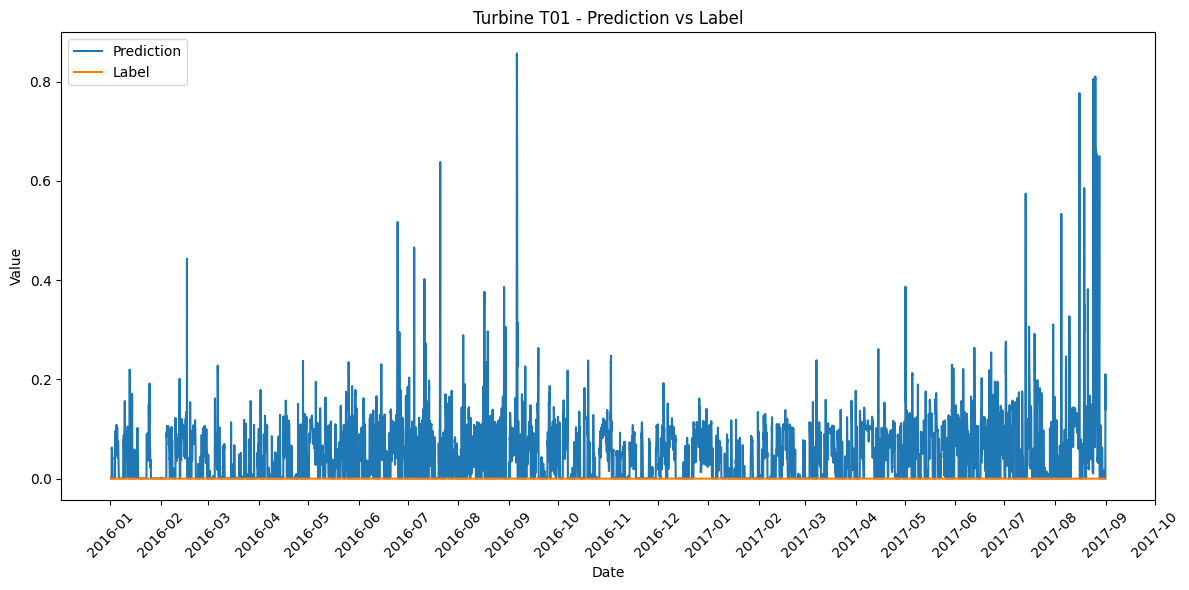

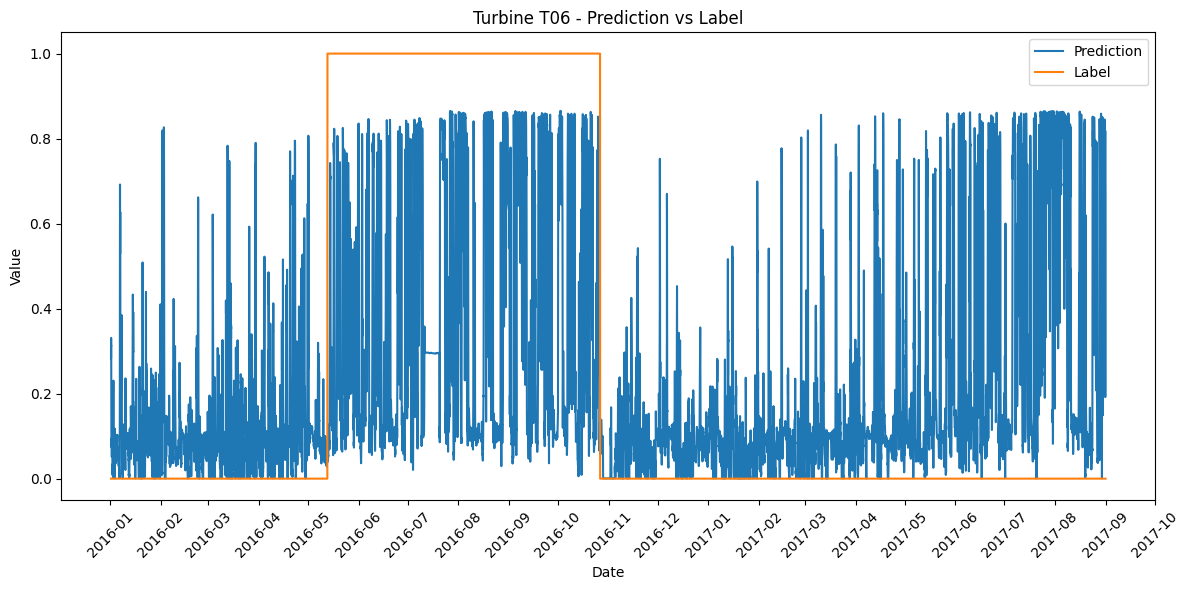

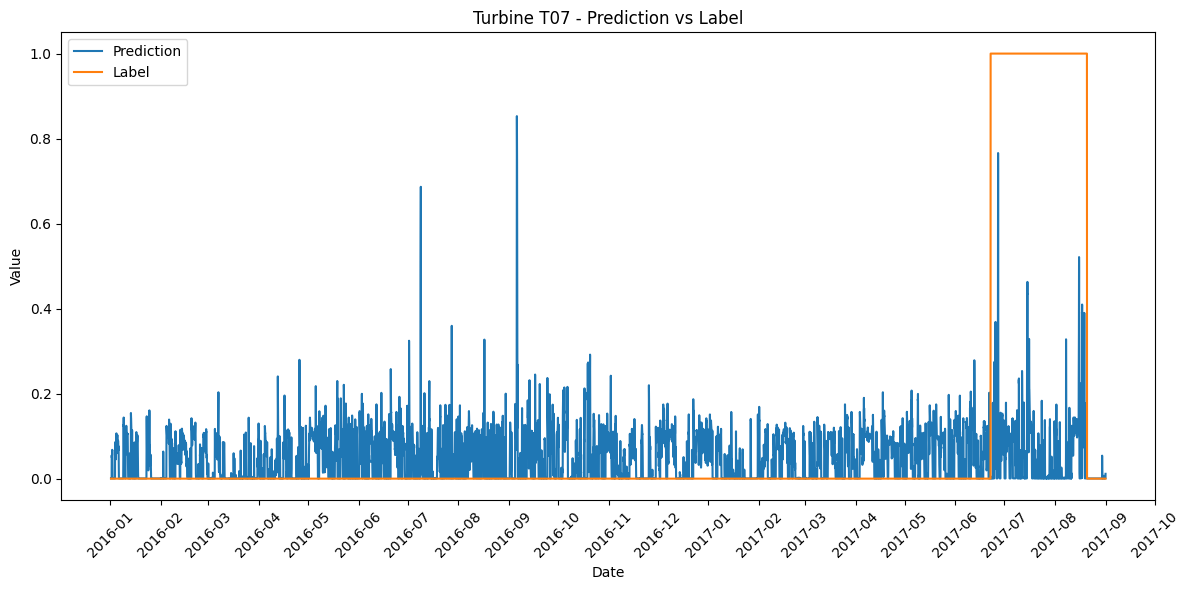

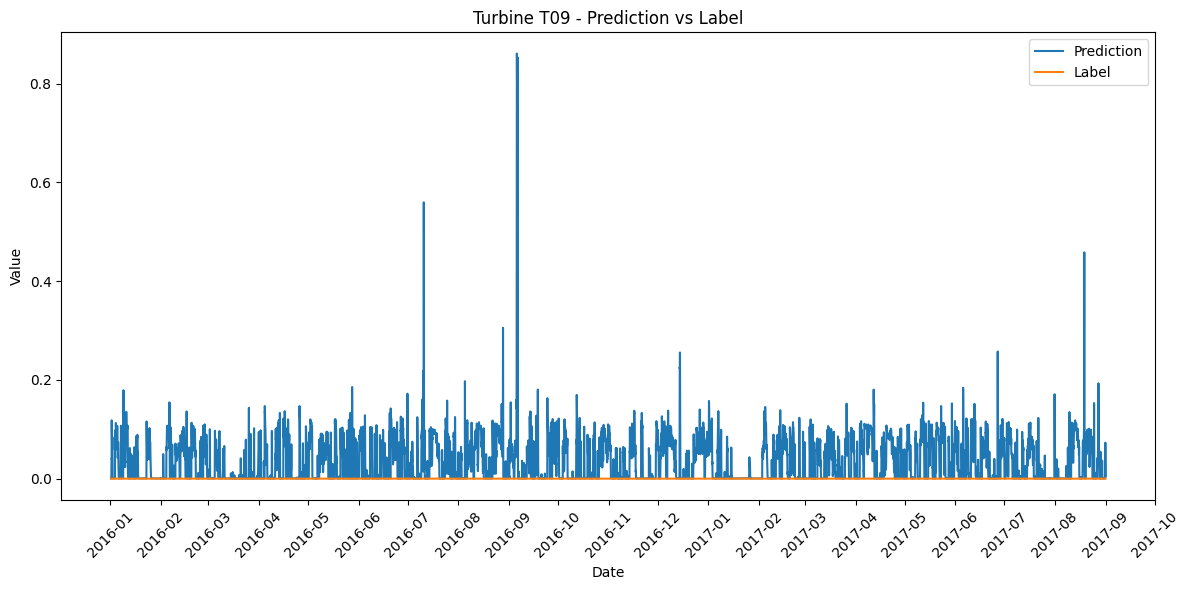

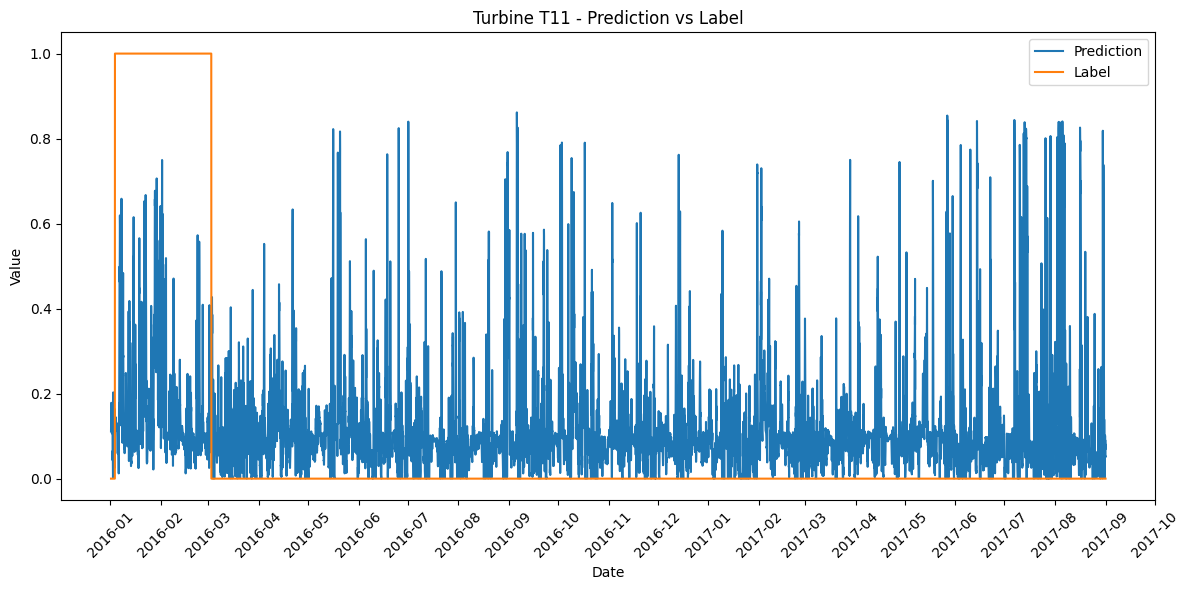

In [31]:
plot_all_turbines(prediction_df)

In [25]:
from functools import reduce

turbine_id = 'all'

model = DualInputLSTM(
    signal_input_size=81,
    metmast_input_size=40,
    hidden_size=64,
    output_size=1,
    num_layers=5,
    dropout=0.1,
).to(device)

components = ['GENERATOR_BEARING', 'GENERATOR', 'HYDRAULIC_GROUP', 'TRANSFORMER', 'GEARBOX']

train_predictions_lst = []

for component in components:

    desc = f"{model.name}_{turbine_id}_{component}"

    # Get predictions for the test data
    train_predictions_i = get_predictions(model, X_signal, X_metmast, desc, device)
    train_predictions_df_i = create_prediction_dataframe_all(signals_filled, train_predictions_i, window_size=64)
    train_predictions_df_i.rename(columns={'Prediction': component}, inplace=True)
    train_predictions_lst.append(train_predictions_df_i)

# Assuming your list of DataFrames is named 'dfs'
train_predictions = reduce(lambda left, right: pd.merge(left, right, on=['Turbine_ID', 'Timestamp']), train_predictions_lst)
train_predictions

Loading existing model from Model/DualInputLSTM_all_GENERATOR_BEARING.pt


Processing Batches: 100%|██████████| 427/427 [00:42<00:00, 10.12it/s]


Loading existing model from Model/DualInputLSTM_all_GENERATOR.pt


Processing Batches: 100%|██████████| 427/427 [00:45<00:00,  9.31it/s]


Loading existing model from Model/DualInputLSTM_all_HYDRAULIC_GROUP.pt


Processing Batches: 100%|██████████| 427/427 [00:52<00:00,  8.20it/s]


Loading existing model from Model/DualInputLSTM_all_TRANSFORMER.pt


Processing Batches: 100%|██████████| 427/427 [00:45<00:00,  9.40it/s]


Loading existing model from Model/DualInputLSTM_all_GEARBOX.pt


Processing Batches: 100%|██████████| 427/427 [00:45<00:00,  9.47it/s]


,Turbine_ID,Timestamp,GENERATOR_BEARING,GENERATOR,HYDRAULIC_GROUP,TRANSFORMER,GEARBOX
0,T01,2016-01-01 10:30:00+00:00,0.041611,0.000496,0.006863,0.006856,0.005222
1,T01,2016-01-01 10:40:00+00:00,0.041585,0.000497,0.006827,0.006853,0.005216
2,T01,2016-01-01 10:50:00+00:00,0.041555,0.000496,0.006788,0.006885,0.005205
3,T01,2016-01-01 11:00:00+00:00,0.041553,0.000497,0.006759,0.006661,0.005199
4,T01,2016-01-01 11:10:00+00:00,0.041566,0.000497,0.006735,0.006522,0.005197
...,...,...,...,...,...,...,...
436390,T11,2017-08-31 23:20:00+00:00,0.050653,0.051608,0.013945,0.034373,0.174855
436391,T11,2017-08-31 23:30:00+00:00,0.049710,0.051146,0.013326,0.033290,0.174944
436392,T11,2017-08-31 23:40:00+00:00,0.048707,0.050688,0.012888,0.030470,0.174561
436393,T11,2017-08-31 23:50:00+00:00,0.047779,0.050728,0.012566,0.026742,0.173713


In [23]:
def apply_thresholds(df, thresholds, components, window):
    # Get the column names of the last five columns
    df = df.copy()
    cols = components
    
    # Create a dictionary to map column names to their respective thresholds
    threshold_dict = dict(zip(cols, thresholds))
    
    # Group the DataFrame by Turbine_ID
    grouped_df = df.groupby('Turbine_ID')
    
    # Initialize an empty list to store the modified DataFrames for each Turbine_ID
    modified_dfs = []
    
    # Iterate over each Turbine_ID group
    for turbine_id, group_df in grouped_df:
        # Apply the thresholds to the last five columns and replace values with 0 or 1
        for col, threshold in threshold_dict.items():
            group_df[col] = group_df[col].apply(lambda x: 1 if x > threshold else 0)
        
        # Convert the 'Timestamp' column to datetime if it's not already
        if not pd.api.types.is_datetime64_any_dtype(group_df['Timestamp']):
            group_df['Timestamp'] = pd.to_datetime(group_df['Timestamp'])
        
        # Calculate the window duration based on the number of days
        window_duration = pd.Timedelta(days=window)
        
        # Initialize a dictionary to store the last occurrence of 1 for each column
        last_occurrence = {col: group_df['Timestamp'].min() - window_duration for col in cols}
        
        # Iterate over each row in the group DataFrame
        for index, row in group_df.iterrows():
            # Iterate over each column in the last five columns
            for col in cols:
                # Check if the value is 1 and if the window has passed since the last occurrence of 1
                if row[col] == 1 and row['Timestamp'] - last_occurrence[col] >= window_duration:
                    last_occurrence[col] = row['Timestamp']
                else:
                    group_df.at[index, col] = 0
        
        # Append the modified group DataFrame to the list
        modified_dfs.append(group_df)
    
    # Concatenate all the modified DataFrames into a single DataFrame
    modified_df = pd.concat(modified_dfs)
    
    return modified_df

In [53]:
thresholds = [0.5, 0.6, 0.5, 0.5, 0.5]
components = ['GENERATOR_BEARING', 'GENERATOR', 'HYDRAULIC_GROUP', 'TRANSFORMER', 'GEARBOX']
window = 60

train_predictions_thres = apply_thresholds(train_predictions, thresholds, components, window=window)
train_predictions_thres

,Turbine_ID,Timestamp,GENERATOR_BEARING,GENERATOR,HYDRAULIC_GROUP,TRANSFORMER,GEARBOX
0,T01,2016-01-01 10:30:00+00:00,0,0,0,0,0
1,T01,2016-01-01 10:40:00+00:00,0,0,0,0,0
2,T01,2016-01-01 10:50:00+00:00,0,0,0,0,0
3,T01,2016-01-01 11:00:00+00:00,0,0,0,0,0
4,T01,2016-01-01 11:10:00+00:00,0,0,0,0,0
...,...,...,...,...,...,...,...
436390,T11,2017-08-31 23:20:00+00:00,0,0,0,0,0
436391,T11,2017-08-31 23:30:00+00:00,0,0,0,0,0
436392,T11,2017-08-31 23:40:00+00:00,0,0,0,0,0
436393,T11,2017-08-31 23:50:00+00:00,0,0,0,0,0


In [54]:
train_predictions_thres[components].sum(axis=0)

GENERATOR_BEARING    22
GENERATOR            24
HYDRAULIC_GROUP       0
TRANSFORMER           8
GEARBOX               0
dtype: int64

In [24]:
def calculate_total_saving(prediction_data, failure_data):

    prediction_data, failure_data = prediction_data.copy(), failure_data.copy()

    prediction_data['Timestamp'], failure_data['Timestamp'] = pd.to_datetime(prediction_data['Timestamp']), pd.to_datetime(failure_data['Timestamp'])

    # Define the cost values for each subsystem
    cost_values = {
        'GEARBOX': {'R': 100000, 'M': 20000, 'I': 5000},
        'GENERATOR': {'R': 60000, 'M': 15000, 'I': 5000},
        'GENERATOR_BEARING': {'R': 30000, 'M': 12500, 'I': 4500},
        'TRANSFORMER': {'R': 50000, 'M': 3500, 'I': 1500},
        'HYDRAULIC_GROUP': {'R': 20000, 'M': 3000, 'I': 2000}
    }
    
    components = ['GENERATOR_BEARING', 'GENERATOR', 'HYDRAULIC_GROUP', 'TRANSFORMER', 'GEARBOX']
    
    # Define the allowable time window in days
    allowable_time_window = 60
    
    total_saving = 0
    
    # Iterate over each turbine ID
    for turbine_id in prediction_data['Turbine_ID'].unique():
        turbine_prediction = prediction_data[prediction_data['Turbine_ID'] == turbine_id]
        turbine_failure = failure_data[failure_data['Turbine_ID'] == turbine_id]
        
        # Iterate over each subsystem
        for subsystem in components:
            subsystem_prediction = turbine_prediction[turbine_prediction[subsystem] == 1]
            
            # Iterate over each alarm in the subsystem
            for _, alarm in subsystem_prediction.iterrows():
                # Find the corresponding true event within the allowable time window
                true_event = turbine_failure[(turbine_failure['Component'] == subsystem) & 
                                             (turbine_failure['Timestamp'] > alarm['Timestamp']) &
                                             (turbine_failure['Timestamp'] <= alarm['Timestamp'] + pd.Timedelta(days=allowable_time_window))]
                
                if len(true_event) > 0:
                    # True positive
                    lead_time = (true_event['Timestamp'].iloc[0] - alarm['Timestamp']).days
                    tp_saving = (cost_values[subsystem]['R'] - cost_values[subsystem]['M']) * (lead_time / allowable_time_window)
                    total_saving += tp_saving
                    print(f"Successfully find fault on {alarm['Turbine_ID']} on date {alarm['Timestamp']} on component {subsystem}, saved {tp_saving}")
                    
                    # Remove the repaired component from future calculations
                    failure_data = failure_data[~((failure_data['Turbine_ID'] == turbine_id) & (failure_data['Component'] == subsystem))]
                else:
                    # False positive
                    fp_saving = cost_values[subsystem]['I']
                    total_saving -= fp_saving
                    print(f"Get a False Positive on {alarm['Turbine_ID']} on date {alarm['Timestamp']} on component {subsystem}, loss {fp_saving}")
        
        # Check for false negatives
        for subsystem in components:
            true_events = turbine_failure[turbine_failure['Component'] == subsystem]
            
            for _, event in true_events.iterrows():
                alarm = turbine_prediction[(turbine_prediction['Timestamp'] >= event['Timestamp'] - pd.Timedelta(days=allowable_time_window)) &
                                           (turbine_prediction['Timestamp'] < event['Timestamp']) &
                                           (turbine_prediction[subsystem] == 1)]
                
                if len(alarm) == 0:
                    # False negative
                    fn_saving = cost_values[subsystem]['R']
                    total_saving -= fn_saving
                    print(f"Get a False Negative on {event['Turbine_ID']} on date {event['Timestamp']} on component {subsystem}, loss {fn_saving}")
    
    print(f"The total saving is: {total_saving}")
    return total_saving

In [55]:
total_saving = calculate_total_saving(train_predictions_thres, failures)

Get a False Positive on T01 on date 2016-07-04 01:50:00+00:00 on component GENERATOR_BEARING, loss 4500
Get a False Positive on T01 on date 2017-07-12 15:50:00+00:00 on component GENERATOR_BEARING, loss 4500
Get a False Positive on T01 on date 2016-07-20 21:10:00+00:00 on component GENERATOR, loss 5000
Get a False Positive on T01 on date 2017-08-15 23:40:00+00:00 on component GENERATOR, loss 5000
Get a False Positive on T01 on date 2016-07-11 05:10:00+00:00 on component TRANSFORMER, loss 1500
Get a False Negative on T01 on date 2017-08-11 13:14:00+00:00 on component TRANSFORMER, loss 50000
Get a False Negative on T01 on date 2016-07-18 02:10:00+00:00 on component GEARBOX, loss 100000
Get a False Positive on T06 on date 2016-07-26 18:10:00+00:00 on component GENERATOR_BEARING, loss 4500
Get a False Positive on T06 on date 2017-06-12 21:50:00+00:00 on component GENERATOR_BEARING, loss 4500
Get a False Positive on T06 on date 2016-01-06 22:00:00+00:00 on component GENERATOR, loss 5000
Get

In [41]:
train_predictions_thres_bench = train_predictions_thres.copy()
train_predictions_thres_bench[components] = 0
total_saving = calculate_total_saving(train_predictions_thres_bench, failures)

Get a False Negative on T01 on date 2017-08-11 13:14:00+00:00 on component TRANSFORMER, loss 50000
Get a False Negative on T01 on date 2016-07-18 02:10:00+00:00 on component GEARBOX, loss 100000
Get a False Negative on T06 on date 2016-07-11 19:48:00+00:00 on component GENERATOR, loss 60000
Get a False Negative on T06 on date 2016-07-24 17:01:00+00:00 on component GENERATOR, loss 60000
Get a False Negative on T06 on date 2016-09-04 08:08:00+00:00 on component GENERATOR, loss 60000
Get a False Negative on T06 on date 2016-10-02 17:08:00+00:00 on component GENERATOR, loss 60000
Get a False Negative on T06 on date 2016-10-27 16:26:00+00:00 on component GENERATOR, loss 60000
Get a False Negative on T06 on date 2016-04-04 18:53:00+00:00 on component HYDRAULIC_GROUP, loss 20000
Get a False Negative on T06 on date 2017-08-19 09:47:00+00:00 on component HYDRAULIC_GROUP, loss 20000
Get a False Negative on T07 on date 2016-04-30 12:40:00+00:00 on component GENERATOR_BEARING, loss 30000
Get a Fal

## In-sample Evaluation by Anomaly Transformer

In [50]:
from functools import reduce

turbine_id = 'all'
component = 'GENERATOR'

model = AnomalyTransformer(
    signal_enc_in=81,
    metmast_enc_in=40,
    c_out=1,
    dropout=0.1,
    win_size=window_size  # Pass the window_size as an integer
).to(device)

components = ['GENERATOR_BEARING', 'GENERATOR', 'HYDRAULIC_GROUP', 'TRANSFORMER', 'GEARBOX']

train_predictions_lst = []

for component in components:

    desc = f"{model.name}_{turbine_id}_{component}"

    # Get predictions for the test data
    train_predictions_i = get_predictions(model, X_signal, X_metmast, desc, device)
    train_predictions_df_i = create_prediction_dataframe_all(signals_filled, train_predictions_i, window_size=64)
    train_predictions_df_i.rename(columns={'Prediction': component}, inplace=True)
    train_predictions_lst.append(train_predictions_df_i)

# Assuming your list of DataFrames is named 'dfs'
train_predictions = reduce(lambda left, right: pd.merge(left, right, on=['Turbine_ID', 'Timestamp']), train_predictions_lst)
train_predictions

Loading existing model from Model/AnomalyTransformer_all_GENERATOR_BEARING.pt


Processing Batches: 100%|██████████| 427/427 [01:24<00:00,  5.03it/s]


Loading existing model from Model/AnomalyTransformer_all_GENERATOR.pt


Processing Batches: 100%|██████████| 427/427 [01:34<00:00,  4.52it/s]


Loading existing model from Model/AnomalyTransformer_all_HYDRAULIC_GROUP.pt


Processing Batches: 100%|██████████| 427/427 [01:18<00:00,  5.47it/s]


Loading existing model from Model/AnomalyTransformer_all_TRANSFORMER.pt


Processing Batches: 100%|██████████| 427/427 [01:20<00:00,  5.29it/s]


Loading existing model from Model/AnomalyTransformer_all_GEARBOX.pt


Processing Batches: 100%|██████████| 427/427 [01:17<00:00,  5.51it/s]


,Turbine_ID,Timestamp,GENERATOR_BEARING,GENERATOR,HYDRAULIC_GROUP,TRANSFORMER,GEARBOX
0,T01,2016-01-01 10:30:00+00:00,4.653283e-05,6.776723e-09,7.056177e-07,4.028685e-07,7.260142e-08
1,T01,2016-01-01 10:40:00+00:00,7.587499e-06,5.524168e-09,1.794367e-07,4.484655e-07,6.569901e-07
2,T01,2016-01-01 10:50:00+00:00,6.823779e-05,5.963237e-09,2.473731e-07,6.147852e-07,3.987665e-08
3,T01,2016-01-01 11:00:00+00:00,5.803571e-05,6.324496e-09,2.188778e-07,5.395018e-07,1.442845e-06
4,T01,2016-01-01 11:10:00+00:00,1.897635e-05,6.230163e-09,2.279745e-07,3.714245e-07,1.712307e-06
...,...,...,...,...,...,...,...
436390,T11,2017-08-31 23:20:00+00:00,9.139907e-04,3.338150e-08,1.277878e-03,1.540827e-02,3.899198e-04
436391,T11,2017-08-31 23:30:00+00:00,3.579476e-07,1.007432e-07,8.257439e-04,3.718959e-03,1.169513e-04
436392,T11,2017-08-31 23:40:00+00:00,1.433975e-06,3.252495e-08,7.156947e-04,2.799195e-03,8.163682e-05
436393,T11,2017-08-31 23:50:00+00:00,4.735586e-07,1.030423e-07,1.563925e-03,6.915847e-03,4.916498e-05


In [54]:
thresholds = [0.25, 0.25, 0.25, 0.25, 0.25]
components = ['GENERATOR_BEARING', 'GENERATOR', 'HYDRAULIC_GROUP', 'TRANSFORMER', 'GEARBOX']
window = 60

train_predictions_thres = apply_thresholds(train_predictions, thresholds, components, window=window)
train_predictions_thres

,Turbine_ID,Timestamp,GENERATOR_BEARING,GENERATOR,HYDRAULIC_GROUP,TRANSFORMER,GEARBOX
0,T01,2016-01-01 10:30:00+00:00,0,0,0,0,0
1,T01,2016-01-01 10:40:00+00:00,0,0,0,0,0
2,T01,2016-01-01 10:50:00+00:00,0,0,0,0,0
3,T01,2016-01-01 11:00:00+00:00,0,0,0,0,0
4,T01,2016-01-01 11:10:00+00:00,0,0,0,0,0
...,...,...,...,...,...,...,...
436390,T11,2017-08-31 23:20:00+00:00,0,0,0,0,0
436391,T11,2017-08-31 23:30:00+00:00,0,0,0,0,0
436392,T11,2017-08-31 23:40:00+00:00,0,0,0,0,0
436393,T11,2017-08-31 23:50:00+00:00,0,0,0,0,0


In [55]:
train_predictions_thres[components].sum(axis=0)

GENERATOR_BEARING    2
GENERATOR            6
HYDRAULIC_GROUP      2
TRANSFORMER          2
GEARBOX              3
dtype: int64

In [56]:
total_saving = calculate_total_saving(train_predictions_thres, failures)

Get a False Positive on T01 on date 2016-03-16 12:30:00+00:00 on component GENERATOR, loss 5000
Get a False Positive on T01 on date 2017-08-08 20:50:00+00:00 on component GENERATOR, loss 5000
Get a False Negative on T01 on date 2017-08-11 13:14:00+00:00 on component TRANSFORMER, loss 50000
Get a False Negative on T01 on date 2016-07-18 02:10:00+00:00 on component GEARBOX, loss 100000
Get a False Positive on T06 on date 2016-03-16 20:00:00+00:00 on component GENERATOR_BEARING, loss 4500
Get a False Positive on T06 on date 2017-01-21 23:00:00+00:00 on component GENERATOR_BEARING, loss 4500
Get a False Negative on T06 on date 2016-07-11 19:48:00+00:00 on component GENERATOR, loss 60000
Get a False Negative on T06 on date 2016-07-24 17:01:00+00:00 on component GENERATOR, loss 60000
Get a False Negative on T06 on date 2016-09-04 08:08:00+00:00 on component GENERATOR, loss 60000
Get a False Negative on T06 on date 2016-10-02 17:08:00+00:00 on component GENERATOR, loss 60000
Get a False Negat

## In-sample Evaluation by ALSTM

In [56]:
from functools import reduce

turbine_id = 'all'
component = 'GENERATOR'

model = DualInputALSTM(
    signal_input_size=81,
    metmast_input_size=40,
    hidden_size=64,
    output_size=1,
    num_layers=5,
    dropout=0.1,
).to(device)

components = ['GENERATOR_BEARING', 'GENERATOR', 'HYDRAULIC_GROUP', 'TRANSFORMER', 'GEARBOX']

train_predictions_lst = []

for component in components:

    desc = f"{model.name}_{turbine_id}_{component}"

    # Get predictions for the test data
    train_predictions_i = get_predictions(model, X_signal, X_metmast, desc, device)
    train_predictions_df_i = create_prediction_dataframe_all(signals_filled, train_predictions_i, window_size=64)
    train_predictions_df_i.rename(columns={'Prediction': component}, inplace=True)
    train_predictions_lst.append(train_predictions_df_i)

# Assuming your list of DataFrames is named 'dfs'
train_predictions = reduce(lambda left, right: pd.merge(left, right, on=['Turbine_ID', 'Timestamp']), train_predictions_lst)
train_predictions

Loading existing model from Model/DualInputALSTM_all_GENERATOR_BEARING.pt


Processing Batches: 100%|██████████| 427/427 [01:16<00:00,  5.62it/s]


Loading existing model from Model/DualInputALSTM_all_GENERATOR.pt


Processing Batches: 100%|██████████| 427/427 [01:03<00:00,  6.69it/s]


Loading existing model from Model/DualInputALSTM_all_HYDRAULIC_GROUP.pt


Processing Batches: 100%|██████████| 427/427 [00:51<00:00,  8.35it/s]


Loading existing model from Model/DualInputALSTM_all_TRANSFORMER.pt


Processing Batches: 100%|██████████| 427/427 [00:53<00:00,  8.01it/s]


Loading existing model from Model/DualInputALSTM_all_GEARBOX.pt


Processing Batches: 100%|██████████| 427/427 [01:05<00:00,  6.50it/s]


,Turbine_ID,Timestamp,GENERATOR_BEARING,GENERATOR,HYDRAULIC_GROUP,TRANSFORMER,GEARBOX
0,T01,2016-01-01 10:30:00+00:00,0.038613,0.001216,0.005089,0.012235,0.048343
1,T01,2016-01-01 10:40:00+00:00,0.038365,0.001059,0.004843,0.012470,0.049622
2,T01,2016-01-01 10:50:00+00:00,0.038324,0.000824,0.004708,0.025966,0.048945
3,T01,2016-01-01 11:00:00+00:00,0.036808,0.000830,0.004838,0.015132,0.048222
4,T01,2016-01-01 11:10:00+00:00,0.036996,0.000761,0.004737,0.014549,0.046975
...,...,...,...,...,...,...,...
436390,T11,2017-08-31 23:20:00+00:00,0.063467,0.345000,0.043702,0.030885,0.084148
436391,T11,2017-08-31 23:30:00+00:00,0.062608,0.347848,0.042371,0.033552,0.083951
436392,T11,2017-08-31 23:40:00+00:00,0.061524,0.352989,0.041293,0.035269,0.081767
436393,T11,2017-08-31 23:50:00+00:00,0.060490,0.358564,0.040103,0.033578,0.077742


In [57]:
thresholds = [0.5, 0.5, 0.5, 0.5, 0.5]
components = ['GENERATOR_BEARING', 'GENERATOR', 'HYDRAULIC_GROUP', 'TRANSFORMER', 'GEARBOX']
window = 60

train_predictions_thres = apply_thresholds(train_predictions, thresholds, components, window=window)
train_predictions_thres

,Turbine_ID,Timestamp,GENERATOR_BEARING,GENERATOR,HYDRAULIC_GROUP,TRANSFORMER,GEARBOX
0,T01,2016-01-01 10:30:00+00:00,0,0,0,0,0
1,T01,2016-01-01 10:40:00+00:00,0,0,0,0,0
2,T01,2016-01-01 10:50:00+00:00,0,0,0,0,0
3,T01,2016-01-01 11:00:00+00:00,0,0,0,0,0
4,T01,2016-01-01 11:10:00+00:00,0,0,0,0,0
...,...,...,...,...,...,...,...
436390,T11,2017-08-31 23:20:00+00:00,0,0,0,0,0
436391,T11,2017-08-31 23:30:00+00:00,0,0,0,0,0
436392,T11,2017-08-31 23:40:00+00:00,0,0,0,0,0
436393,T11,2017-08-31 23:50:00+00:00,0,0,0,0,0


In [58]:
train_predictions_thres[components].sum(axis=0)

GENERATOR_BEARING    26
GENERATOR            31
HYDRAULIC_GROUP       0
TRANSFORMER          16
GEARBOX               0
dtype: int64

In [59]:
total_saving = calculate_total_saving(train_predictions_thres, failures)

Get a False Positive on T01 on date 2016-06-30 20:00:00+00:00 on component GENERATOR_BEARING, loss 4500
Get a False Positive on T01 on date 2016-09-19 17:20:00+00:00 on component GENERATOR_BEARING, loss 4500
Get a False Positive on T01 on date 2017-04-25 20:30:00+00:00 on component GENERATOR_BEARING, loss 4500
Get a False Positive on T01 on date 2017-07-04 05:50:00+00:00 on component GENERATOR_BEARING, loss 4500
Get a False Positive on T01 on date 2016-07-11 00:10:00+00:00 on component GENERATOR, loss 5000
Get a False Positive on T01 on date 2017-08-15 20:30:00+00:00 on component GENERATOR, loss 5000
Get a False Positive on T01 on date 2016-02-16 03:10:00+00:00 on component TRANSFORMER, loss 1500
Get a False Positive on T01 on date 2016-09-13 08:30:00+00:00 on component TRANSFORMER, loss 1500
Successfully find fault on T01 on date 2017-06-21 12:50:00+00:00 on component TRANSFORMER, saved 39525.0
Get a False Negative on T01 on date 2016-07-18 02:10:00+00:00 on component GEARBOX, loss 10

## In-sample Evaluation by SFM

In [31]:
from functools import reduce

turbine_id = 'all'

model = DualInputSFMModel(
    signal_dim=81,
    metmast_dim=40,
    hidden_size=64,
    output_dim=1,
    dropout_W=0.1,
    dropout_U=0.1,
).to(device)

components = ['GENERATOR_BEARING', 'GENERATOR', 'HYDRAULIC_GROUP', 'TRANSFORMER', 'GEARBOX']

train_predictions_lst = []

for component in components:

    desc = f"{model.name}_{turbine_id}_{component}"

    # Get predictions for the test data
    train_predictions_i = get_predictions(model, X_signal, X_metmast, desc, device)
    train_predictions_df_i = create_prediction_dataframe_all(signals_filled, train_predictions_i, window_size=64)
    train_predictions_df_i.rename(columns={'Prediction': component}, inplace=True)
    train_predictions_lst.append(train_predictions_df_i)

# Assuming your list of DataFrames is named 'dfs'
train_predictions = reduce(lambda left, right: pd.merge(left, right, on=['Turbine_ID', 'Timestamp']), train_predictions_lst)
train_predictions

Loading existing model from Model/DualInputSFM_all_GENERATOR_BEARING.pt


Processing Batches: 100%|██████████| 427/427 [05:24<00:00,  1.32it/s]


Loading existing model from Model/DualInputSFM_all_GENERATOR.pt


Processing Batches: 100%|██████████| 427/427 [05:15<00:00,  1.35it/s]


Loading existing model from Model/DualInputSFM_all_HYDRAULIC_GROUP.pt


Processing Batches: 100%|██████████| 427/427 [05:12<00:00,  1.37it/s]


Loading existing model from Model/DualInputSFM_all_TRANSFORMER.pt


Processing Batches: 100%|██████████| 427/427 [05:17<00:00,  1.35it/s]


Loading existing model from Model/DualInputSFM_all_GEARBOX.pt


Processing Batches: 100%|██████████| 427/427 [05:11<00:00,  1.37it/s]


,Turbine_ID,Timestamp,GENERATOR_BEARING,GENERATOR,HYDRAULIC_GROUP,TRANSFORMER,GEARBOX
0,T01,2016-01-01 10:30:00+00:00,0.110171,0.087310,0.073340,0.039501,0.059220
1,T01,2016-01-01 10:40:00+00:00,0.105183,0.082119,0.072824,0.042942,0.060477
2,T01,2016-01-01 10:50:00+00:00,0.117199,0.078449,0.073157,0.048812,0.062774
3,T01,2016-01-01 11:00:00+00:00,0.121671,0.075228,0.077496,0.039211,0.059515
4,T01,2016-01-01 11:10:00+00:00,0.115368,0.080480,0.076993,0.037720,0.060084
...,...,...,...,...,...,...,...
436390,T11,2017-08-31 23:20:00+00:00,0.177498,0.100662,0.084346,0.073521,0.055755
436391,T11,2017-08-31 23:30:00+00:00,0.181004,0.094900,0.080377,0.070636,0.056228
436392,T11,2017-08-31 23:40:00+00:00,0.176924,0.092768,0.077838,0.069687,0.057287
436393,T11,2017-08-31 23:50:00+00:00,0.186687,0.092653,0.077608,0.065364,0.055820


In [45]:
thresholds = [0.5, 0.5, 0.2, 0.2, 0.1]
components = ['GENERATOR_BEARING', 'GENERATOR', 'HYDRAULIC_GROUP', 'TRANSFORMER', 'GEARBOX']
window = 60

train_predictions_thres = apply_thresholds(train_predictions, thresholds, components, window=window)
train_predictions_thres

,Turbine_ID,Timestamp,GENERATOR_BEARING,GENERATOR,HYDRAULIC_GROUP,TRANSFORMER,GEARBOX
0,T01,2016-01-01 10:30:00+00:00,0,0,0,0,0
1,T01,2016-01-01 10:40:00+00:00,0,0,0,0,0
2,T01,2016-01-01 10:50:00+00:00,0,0,0,0,0
3,T01,2016-01-01 11:00:00+00:00,0,0,0,0,0
4,T01,2016-01-01 11:10:00+00:00,0,0,0,0,0
...,...,...,...,...,...,...,...
436390,T11,2017-08-31 23:20:00+00:00,0,0,0,0,0
436391,T11,2017-08-31 23:30:00+00:00,0,0,0,0,0
436392,T11,2017-08-31 23:40:00+00:00,0,0,0,0,0
436393,T11,2017-08-31 23:50:00+00:00,0,0,0,0,0


In [46]:
train_predictions_thres[components].sum(axis=0)

GENERATOR_BEARING    0
GENERATOR            2
HYDRAULIC_GROUP      0
TRANSFORMER          1
GEARBOX              3
dtype: int64

In [47]:
total_saving = calculate_total_saving(train_predictions_thres, failures)

Get a False Positive on T01 on date 2016-09-06 19:30:00+00:00 on component GENERATOR, loss 5000
Get a False Negative on T01 on date 2017-08-11 13:14:00+00:00 on component TRANSFORMER, loss 50000
Get a False Negative on T01 on date 2016-07-18 02:10:00+00:00 on component GEARBOX, loss 100000
Get a False Positive on T06 on date 2017-04-27 16:00:00+00:00 on component GENERATOR, loss 5000
Get a False Positive on T06 on date 2016-09-04 21:10:00+00:00 on component GEARBOX, loss 5000
Get a False Negative on T06 on date 2016-07-11 19:48:00+00:00 on component GENERATOR, loss 60000
Get a False Negative on T06 on date 2016-07-24 17:01:00+00:00 on component GENERATOR, loss 60000
Get a False Negative on T06 on date 2016-09-04 08:08:00+00:00 on component GENERATOR, loss 60000
Get a False Negative on T06 on date 2016-10-02 17:08:00+00:00 on component GENERATOR, loss 60000
Get a False Negative on T06 on date 2016-10-27 16:26:00+00:00 on component GENERATOR, loss 60000
Get a False Negative on T06 on dat

## In-sample Evaluation by TCN

In [23]:
from functools import reduce

turbine_id = 'all'

model = DualInputTCNModel(
    signal_input_size=window_size,
    metmast_input_size=window_size,
    num_signal_feature=81,
    num_metmast_feature=40,
    output_size=1,
    dropout=0.1,
).to(device)

components = ['GENERATOR_BEARING', 'GENERATOR', 'HYDRAULIC_GROUP', 'TRANSFORMER', 'GEARBOX']

train_predictions_lst = []

for component in components:

    desc = f"{model.name}_{turbine_id}_{component}"

    # Get predictions for the test data
    train_predictions_i = get_predictions(model, X_signal, X_metmast, desc, device)
    train_predictions_df_i = create_prediction_dataframe_all(signals_filled, train_predictions_i, window_size=64)
    train_predictions_df_i.rename(columns={'Prediction': component}, inplace=True)
    train_predictions_lst.append(train_predictions_df_i)

# Assuming your list of DataFrames is named 'dfs'
train_predictions = reduce(lambda left, right: pd.merge(left, right, on=['Turbine_ID', 'Timestamp']), train_predictions_lst)
train_predictions

c:\Users\chong\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loading existing model from Model/DualInputTCN_all_GENERATOR_BEARING.pt


Processing Batches: 100%|██████████| 427/427 [01:54<00:00,  3.72it/s]


Loading existing model from Model/DualInputTCN_all_GENERATOR.pt


Processing Batches: 100%|██████████| 427/427 [01:53<00:00,  3.76it/s]


Loading existing model from Model/DualInputTCN_all_HYDRAULIC_GROUP.pt


Processing Batches: 100%|██████████| 427/427 [01:45<00:00,  4.06it/s]


Loading existing model from Model/DualInputTCN_all_TRANSFORMER.pt


Processing Batches: 100%|██████████| 427/427 [01:38<00:00,  4.32it/s]


Loading existing model from Model/DualInputTCN_all_GEARBOX.pt


Processing Batches: 100%|██████████| 427/427 [01:36<00:00,  4.41it/s]


,Turbine_ID,Timestamp,GENERATOR_BEARING,GENERATOR,HYDRAULIC_GROUP,TRANSFORMER,GEARBOX
0,T01,2016-01-01 10:30:00+00:00,0.040791,0.086990,0.078521,0.051126,0.049892
1,T01,2016-01-01 10:40:00+00:00,0.048129,0.081289,0.080410,0.047943,0.049140
2,T01,2016-01-01 10:50:00+00:00,0.040840,0.080869,0.074129,0.051155,0.062939
3,T01,2016-01-01 11:00:00+00:00,0.035036,0.069887,0.079863,0.036740,0.056592
4,T01,2016-01-01 11:10:00+00:00,0.054024,0.071737,0.077657,0.035798,0.053866
...,...,...,...,...,...,...,...
436390,T11,2017-08-31 23:20:00+00:00,0.173156,0.069879,0.072444,0.041122,0.022058
436391,T11,2017-08-31 23:30:00+00:00,0.204849,0.070198,0.062541,0.040664,0.023350
436392,T11,2017-08-31 23:40:00+00:00,0.211475,0.071595,0.071098,0.042236,0.027584
436393,T11,2017-08-31 23:50:00+00:00,0.205800,0.070251,0.060235,0.039943,0.028735


In [30]:
thresholds = [0.5, 0.25, 0.25, 0.25, 0.25]
components = ['GENERATOR_BEARING', 'GENERATOR', 'HYDRAULIC_GROUP', 'TRANSFORMER', 'GEARBOX']
window = 60

train_predictions_thres = apply_thresholds(train_predictions, thresholds, components, window=window)
train_predictions_thres

,Turbine_ID,Timestamp,GENERATOR_BEARING,GENERATOR,HYDRAULIC_GROUP,TRANSFORMER,GEARBOX
0,T01,2016-01-01 10:30:00+00:00,0,0,0,0,0
1,T01,2016-01-01 10:40:00+00:00,0,0,0,0,0
2,T01,2016-01-01 10:50:00+00:00,0,0,0,0,0
3,T01,2016-01-01 11:00:00+00:00,0,0,0,0,0
4,T01,2016-01-01 11:10:00+00:00,0,0,0,0,0
...,...,...,...,...,...,...,...
436390,T11,2017-08-31 23:20:00+00:00,0,0,0,0,0
436391,T11,2017-08-31 23:30:00+00:00,0,0,0,0,0
436392,T11,2017-08-31 23:40:00+00:00,0,0,0,0,0
436393,T11,2017-08-31 23:50:00+00:00,0,0,0,0,0


In [31]:
train_predictions_thres[components].sum(axis=0)

GENERATOR_BEARING    18
GENERATOR             7
HYDRAULIC_GROUP       7
TRANSFORMER          11
GEARBOX               0
dtype: int64

In [32]:
total_saving = calculate_total_saving(train_predictions_thres, failures)

Get a False Positive on T01 on date 2016-09-19 16:10:00+00:00 on component GENERATOR_BEARING, loss 4500
Get a False Positive on T01 on date 2016-07-19 19:40:00+00:00 on component GENERATOR, loss 5000
Get a False Positive on T01 on date 2016-07-17 17:40:00+00:00 on component TRANSFORMER, loss 1500
Get a False Negative on T01 on date 2017-08-11 13:14:00+00:00 on component TRANSFORMER, loss 50000
Get a False Negative on T01 on date 2016-07-18 02:10:00+00:00 on component GEARBOX, loss 100000
Get a False Positive on T06 on date 2016-10-02 02:00:00+00:00 on component GENERATOR_BEARING, loss 4500
Successfully find fault on T06 on date 2016-07-20 18:00:00+00:00 on component GENERATOR, saved 2250.0
Get a False Positive on T06 on date 2016-11-04 01:10:00+00:00 on component GENERATOR, loss 5000
Get a False Positive on T06 on date 2016-08-17 03:00:00+00:00 on component TRANSFORMER, loss 1500
Get a False Positive on T06 on date 2016-10-25 03:10:00+00:00 on component TRANSFORMER, loss 1500
Get a Fal

## In-sample Evaluation by GAT

In [33]:
from functools import reduce

turbine_id = 'all'

model = DualInputGATModel(
    signal_dim=81,
    metmast_dim=40,
    hidden_size=64,
    output_size=1,
    dropout=0.1,
).to(device)

components = ['GENERATOR_BEARING', 'GENERATOR', 'HYDRAULIC_GROUP', 'TRANSFORMER', 'GEARBOX']

train_predictions_lst = []

for component in components:

    desc = f"{model.name}_{turbine_id}_{component}"

    # Get predictions for the test data
    train_predictions_i = get_predictions(model, X_signal, X_metmast, desc, device)
    train_predictions_df_i = create_prediction_dataframe_all(signals_filled, train_predictions_i, window_size=64)
    train_predictions_df_i.rename(columns={'Prediction': component}, inplace=True)
    train_predictions_lst.append(train_predictions_df_i)

# Assuming your list of DataFrames is named 'dfs'
train_predictions_gat = reduce(lambda left, right: pd.merge(left, right, on=['Turbine_ID', 'Timestamp']), train_predictions_lst)
train_predictions_gat

Loading existing model from Model/DualInputGAT_all_GENERATOR_BEARING.pt


Processing Batches: 100%|██████████| 427/427 [04:43<00:00,  1.51it/s]


Loading existing model from Model/DualInputGAT_all_GENERATOR.pt


Processing Batches: 100%|██████████| 427/427 [04:43<00:00,  1.50it/s]


Loading existing model from Model/DualInputGAT_all_HYDRAULIC_GROUP.pt


Processing Batches: 100%|██████████| 427/427 [04:43<00:00,  1.51it/s]


Loading existing model from Model/DualInputGAT_all_TRANSFORMER.pt


Processing Batches: 100%|██████████| 427/427 [04:40<00:00,  1.52it/s]


Loading existing model from Model/DualInputGAT_all_GEARBOX.pt


Processing Batches: 100%|██████████| 427/427 [04:35<00:00,  1.55it/s]


,Turbine_ID,Timestamp,GENERATOR_BEARING,GENERATOR,HYDRAULIC_GROUP,TRANSFORMER,GEARBOX
0,T01,2016-01-01 10:30:00+00:00,0.122311,0.099334,0.075494,0.045219,0.047484
1,T01,2016-01-01 10:40:00+00:00,0.122311,0.099334,0.075494,0.045219,0.047484
2,T01,2016-01-01 10:50:00+00:00,0.122311,0.099334,0.075494,0.045219,0.047484
3,T01,2016-01-01 11:00:00+00:00,0.122311,0.099334,0.075494,0.045219,0.047484
4,T01,2016-01-01 11:10:00+00:00,0.122311,0.099334,0.075494,0.045219,0.047484
...,...,...,...,...,...,...,...
436390,T11,2017-08-31 23:20:00+00:00,0.127574,0.101759,0.075424,0.045444,0.048180
436391,T11,2017-08-31 23:30:00+00:00,0.127574,0.101759,0.075424,0.045444,0.048180
436392,T11,2017-08-31 23:40:00+00:00,0.127574,0.101759,0.075424,0.045444,0.048180
436393,T11,2017-08-31 23:50:00+00:00,0.127574,0.101759,0.075424,0.045444,0.048180


In [34]:
thresholds = [0.5, 0.25, 0.25, 0.25, 0.25]
components = ['GENERATOR_BEARING', 'GENERATOR', 'HYDRAULIC_GROUP', 'TRANSFORMER', 'GEARBOX']
window = 60

train_predictions_thres_gat = apply_thresholds(train_predictions_gat, thresholds, components, window=window)
train_predictions_thres_gat

,Turbine_ID,Timestamp,GENERATOR_BEARING,GENERATOR,HYDRAULIC_GROUP,TRANSFORMER,GEARBOX
0,T01,2016-01-01 10:30:00+00:00,0,0,0,0,0
1,T01,2016-01-01 10:40:00+00:00,0,0,0,0,0
2,T01,2016-01-01 10:50:00+00:00,0,0,0,0,0
3,T01,2016-01-01 11:00:00+00:00,0,0,0,0,0
4,T01,2016-01-01 11:10:00+00:00,0,0,0,0,0
...,...,...,...,...,...,...,...
436390,T11,2017-08-31 23:20:00+00:00,0,0,0,0,0
436391,T11,2017-08-31 23:30:00+00:00,0,0,0,0,0
436392,T11,2017-08-31 23:40:00+00:00,0,0,0,0,0
436393,T11,2017-08-31 23:50:00+00:00,0,0,0,0,0


In [35]:
train_predictions_thres_gat[components].sum(axis=0)

GENERATOR_BEARING    0
GENERATOR            0
HYDRAULIC_GROUP      0
TRANSFORMER          0
GEARBOX              0
dtype: int64

In [ ]:
total_saving = calculate_total_saving(train_predictions_thres_gat, failures)

## Get Prediction on Testing Dataset

In [21]:
from functools import reduce

# model = DualInputLSTM(
#     signal_input_size=81,
#     metmast_input_size=40,
#     hidden_size=64,
#     output_size=1,
#     num_layers=5,
#     dropout=0.1,
# ).to(device)

model = DualInputALSTM(
    signal_input_size=81,
    metmast_input_size=40,
    hidden_size=64,
    output_size=1,
    num_layers=5,
    dropout=0.1,
).to(device)

# model = AnomalyTransformer(
#     signal_enc_in=81,
#     metmast_enc_in=40,
#     c_out=1,
#     dropout=0.1,
#     win_size=64  # Pass the window_size as an integer
# ).to(device)

# model = DualInputTCNModel(
#     signal_input_size=window_size,
#     metmast_input_size=window_size,
#     num_signal_feature=81,
#     num_metmast_feature=40,
#     output_size=1,
#     dropout=0.1,
# ).to(device)

# model = DualInputSFMModel(
#     signal_dim=81,
#     metmast_dim=40,
#     hidden_size=64,
#     output_dim=1,
#     dropout_W=0.1,
#     dropout_U=0.1,
# ).to(device)

# model = DualInputGATModel(
#     signal_dim=81,
#     metmast_dim=40,
#     hidden_size=64,
#     output_size=1,
#     dropout=0.1,
# ).to(device)

components = ['GENERATOR_BEARING', 'GENERATOR', 'HYDRAULIC_GROUP', 'TRANSFORMER', 'GEARBOX']

test_predictions_lst = []

for component in components:

    desc = f"{model.name}_{turbine_id}_{component}"

    # Get predictions for the test data
    test_predictions_i = get_predictions(model, X_test_signal, X_test_metmast, desc, device)
    test_predictions_df_i = create_prediction_dataframe_all(test_signals_filled, test_predictions_i, window_size=1)
    test_predictions_df_i.rename(columns={'Prediction': component}, inplace=True)
    test_predictions_lst.append(test_predictions_df_i)

# Assuming your list of DataFrames is named 'dfs'
test_predictions = reduce(lambda left, right: pd.merge(left, right, on=['Turbine_ID', 'Timestamp']), test_predictions_lst)
test_predictions

Loading existing model from Model/DualInputALSTM_all_GENERATOR_BEARING.pt


Processing Batches: 100%|██████████| 86/86 [00:04<00:00, 17.30it/s]


Loading existing model from Model/DualInputALSTM_all_GENERATOR.pt


Processing Batches: 100%|██████████| 86/86 [00:04<00:00, 20.91it/s]


Loading existing model from Model/DualInputALSTM_all_HYDRAULIC_GROUP.pt


Processing Batches: 100%|██████████| 86/86 [00:03<00:00, 21.75it/s]


Loading existing model from Model/DualInputALSTM_all_TRANSFORMER.pt


Processing Batches: 100%|██████████| 86/86 [00:04<00:00, 20.30it/s]


Loading existing model from Model/DualInputALSTM_all_GEARBOX.pt


Processing Batches: 100%|██████████| 86/86 [00:03<00:00, 21.84it/s]


,Turbine_ID,Timestamp,GENERATOR_BEARING,GENERATOR,HYDRAULIC_GROUP,TRANSFORMER,GEARBOX
0,T01,2017-09-01 00:10:00+00:00,0.049538,0.074577,0.611160,0.010052,0.003299
1,T01,2017-09-01 00:20:00+00:00,0.050324,0.091247,0.591062,0.016160,0.003136
2,T01,2017-09-01 00:30:00+00:00,0.050513,0.092007,0.577000,0.017100,0.003275
3,T01,2017-09-01 00:40:00+00:00,0.050282,0.093897,0.569392,0.017288,0.003545
4,T01,2017-09-01 00:50:00+00:00,0.048914,0.089875,0.576886,0.017571,0.003757
...,...,...,...,...,...,...,...
87830,T11,2017-12-31 23:10:00+00:00,0.127965,0.044418,0.087155,0.015655,0.047826
87831,T11,2017-12-31 23:20:00+00:00,0.156474,0.038413,0.091475,0.015504,0.052555
87832,T11,2017-12-31 23:30:00+00:00,0.148328,0.062708,0.102336,0.017246,0.055510
87833,T11,2017-12-31 23:40:00+00:00,0.155674,0.083793,0.098780,0.021245,0.058857


In [31]:
thresholds = [0.8, 0.8, 0.8, 0.8, 0.8]
window = 60

test_pred_label = apply_thresholds(test_predictions, thresholds, components, window)
test_pred_label

,Turbine_ID,Timestamp,GENERATOR_BEARING,GENERATOR,HYDRAULIC_GROUP,TRANSFORMER,GEARBOX
0,T01,2017-09-01 00:10:00+00:00,0,0,0,0,0
1,T01,2017-09-01 00:20:00+00:00,0,0,0,0,0
2,T01,2017-09-01 00:30:00+00:00,0,0,0,0,0
3,T01,2017-09-01 00:40:00+00:00,0,0,0,0,0
4,T01,2017-09-01 00:50:00+00:00,0,0,0,0,0
...,...,...,...,...,...,...,...
87830,T11,2017-12-31 23:10:00+00:00,0,0,0,0,0
87831,T11,2017-12-31 23:20:00+00:00,0,0,0,0,0
87832,T11,2017-12-31 23:30:00+00:00,0,0,0,0,0
87833,T11,2017-12-31 23:40:00+00:00,0,0,0,0,0


In [32]:
test_pred_label[components].sum(axis=0)

GENERATOR_BEARING    0
GENERATOR            0
HYDRAULIC_GROUP      4
TRANSFORMER          0
GEARBOX              2
dtype: int64

In [33]:
import pandas as pd

def transform_dataframe(data):

    data = data.copy()

    # Create a list of component columns
    component_columns = ['GENERATOR_BEARING', 'GENERATOR', 'HYDRAULIC_GROUP', 'TRANSFORMER', 'GEARBOX']
    
    # Melt the DataFrame to convert component columns to rows
    melted_data = pd.melt(data, id_vars=['Turbine_ID', 'Timestamp'], value_vars=component_columns, var_name='Component', value_name='Value')
    
    # Filter the rows where Value is 1
    filtered_data = melted_data[melted_data['Value'] == 1]
    
    # Drop the 'Value' column
    filtered_data = filtered_data.drop('Value', axis=1)
    
    # Add an empty 'Remarks' column
    filtered_data['Remarks'] = ''
    
    # Reorder the columns
    filtered_data = filtered_data[['Turbine_ID', 'Component', 'Timestamp', 'Remarks']]

    filtered_data.sort_values(by=['Timestamp', 'Turbine_ID'], inplace=True)
    filtered_data.reset_index(drop=True, inplace=True)
    
    return filtered_data

In [37]:
results = transform_dataframe(test_pred_label)
results

,Turbine_ID,Component,Timestamp,Remarks
0,T06,GEARBOX,2017-09-01 00:10:00+00:00,
1,T09,HYDRAULIC_GROUP,2017-09-13 12:40:00+00:00,
2,T07,HYDRAULIC_GROUP,2017-09-18 19:40:00+00:00,
3,T09,GEARBOX,2017-10-03 12:30:00+00:00,
4,T11,HYDRAULIC_GROUP,2017-10-24 13:30:00+00:00,
5,T06,HYDRAULIC_GROUP,2017-11-09 21:40:00+00:00,


In [28]:
results.to_csv(f"{model.name}_results.csv", index=False)

## Please Ignore this part

These are the codes we have tried but turns out to be like rubbish

In [ ]:
def create_month_one_hot_encoding(data):
    # Assuming 'Timestamp' is the column name for the timestamp data
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])
    
    # Extract the month from the 'Timestamp' column
    data['Month'] = data['Timestamp'].dt.month
    
    # Create one-hot encoding for the 'Month' column
    month_one_hot = pd.get_dummies(data['Month'], prefix='Month').astype(np.int32)
    
    # Concatenate the one-hot encoded features with the original data
    data_with_month_one_hot = pd.concat([data, month_one_hot], axis=1)
    
    # Drop the 'Month' column since it's no longer needed
    data_with_month_one_hot.drop('Month', axis=1, inplace=True)
    
    return data_with_month_one_hot


metmast_filled = create_month_one_hot_encoding(metmast_filled)
metmast_filled.head()

,Timestamp,Min_Windspeed1,Max_Windspeed1,Avg_Windspeed1,Var_Windspeed1,Min_Windspeed2,Max_Windspeed2,Avg_Windspeed2,Var_Windspeed2,Min_Winddirection2,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,2016-01-01 00:00:00+00:00,-0.461677,-0.453475,-0.456685,-0.474122,-0.461321,-0.453475,-0.456685,-0.474087,0.366696,...,0,0,0,0,0,0,0,0,0,0
1,2016-01-01 00:10:00+00:00,-0.460232,-0.453456,-0.456666,-0.474532,-0.460232,-0.453456,-0.456309,-0.474496,0.366751,...,0,0,0,0,0,0,0,0,0,0
2,2016-01-01 00:20:00+00:00,-0.462302,-0.454453,-0.458021,-0.477430,-0.462659,-0.454096,-0.457664,-0.477287,0.363645,...,0,0,0,0,0,0,0,0,0,0
3,2016-01-01 00:30:00+00:00,-0.462418,-0.455636,-0.458134,-0.480230,-0.462418,-0.455279,-0.457777,-0.480194,0.361791,...,0,0,0,0,0,0,0,0,0,0
4,2016-01-01 00:40:00+00:00,-0.463740,-0.454458,-0.458385,-0.479555,-0.463026,-0.454101,-0.458028,-0.479555,0.362008,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
class TotalSavingLoss(nn.Module):
    def __init__(self, cost_matrix, allowable_time_window=60):
        super(TotalSavingLoss, self).__init__()
        self.cost_matrix = cost_matrix
        self.allowable_time_window = allowable_time_window

    def forward(self, predictions, targets):
        # predictions: [B, 5]
        # targets: [B, 5]
        
        # Convert predictions to binary values (0 or 1)
        predictions = (predictions > 0.5).float()
        labels = torch.sign(targets)
        
        # Calculate true positives (TP), false negatives (FN), and false positives (FP)
        tp = predictions * labels
        fn = (1 - predictions) * labels
        fp = predictions * (1 - labels)
        
        # Calculate the total saving for each component
        total_saving = ((self.cost_matrix[:, 0] - self.cost_matrix[:, 1]) * tp * targets / self.allowable_time_window).sum() - (fn * self.cost_matrix[:, 0]).sum() - (fp * self.cost_matrix[:, 2]).sum()
        
        # Normalize the total saving by the number of components
        normalized_total_saving = total_saving.sum() / targets.size(0)

        # Negate the normalized total saving to convert it into a loss value
        loss = -normalized_total_saving
        
        return loss

In [ ]:
cost_matrix = torch.tensor([
    [100000, 20000, 5000],    # Gearbox
    [60000, 15000, 5000],     # Generator
    [30000, 12500, 4500],     # Generator bearings
    [50000, 3500, 1500],      # Transformer
    [20000, 3000, 2000]       # Hydraulic
]).to(device)


window_size = 60  # Replace with the appropriate window size

model = AnomalyTransformer(
    signal_enc_in=81,
    metmast_enc_in=40,
    c_out=5,
    dropout=0.1,
    win_size=window_size  # Pass the window_size as an integer
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = TotalSavingLoss(cost_matrix)

trained_model = train_model(model, train_signal_dataset, train_metmast_dataset, val_signal_dataset, val_metmast_dataset, optimizer, criterion, num_epochs=100, batch_size=32, device=device, clip_value=1.0, patience=10)

NameError: name 'TotalSavingLoss' is not defined

In [1]:
import torch
import torch.nn as nn

# Define a simple model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(10, 2)

    def forward(self, x):
        return self.fc(x)

# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available!")
    print("Using GPU:", torch.cuda.get_device_name(0))  # Getting the name of the GPU
else:
    device = torch.device("cpu")
    print("CUDA is not available. Switching to CPU.")

# Create an instance of the model
model = SimpleModel().to(device)

# Create dummy input data
input_data = torch.randn(5, 10).to(device)

# Pass input data through the model
output = model(input_data)

print("Model output shape:", output.shape)

CUDA is available!
Using GPU: NVIDIA GeForce RTX 4090 Laptop GPU
Model output shape: torch.Size([5, 2])


In [27]:
turbine_id = 'all'
# component = 'GENERATOR_BEARING'
component = 'GENERATOR'
# component = 'HYDRAULIC_GROUP'
# component = 'TRANSFORMER'
# component = 'GEARBOX'

method = 'classification'

window_size = 64

X_signal, y_signal = get_all_feature_label(signal_processed, component, window_size=window_size, method=method)
X_train_signal, y_train_signal, X_val_signal, y_val_signal, X_train_metmast, X_val_metmast = split_data(X_signal, y_signal, X_metmast, num_parts=5)
train_signal_dataset = SignalDataset(X_train_signal, y_train_signal)
val_signal_dataset = SignalDataset(X_val_signal, y_val_signal)

train_metmast_dataset = MetmastDataset(X_train_metmast)
val_metmast_dataset = MetmastDataset(X_val_metmast)

window_size = 64  # Replace with the appropriate window size

model = DualInputGATModel(
    signal_dim=81,
    metmast_dim=40,
    hidden_size=64,
    output_size=1,
    dropout=0.1,
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# criterion = nn.MSELoss()
criterion = nn.BCELoss()

desc = f"{model.name}_{turbine_id}_{component}"

trained_model = train_model(model, train_signal_dataset, train_metmast_dataset, val_signal_dataset, val_metmast_dataset, desc, optimizer, criterion, num_epochs=100, batch_size=1024, device=device, clip_value=5.0, patience=1)

Training new model and saving to Model/DualInputGAT_all_GENERATOR.pt


Evaluating: 100%|██████████| 86/86 [00:54<00:00,  1.57batch/s, Loss=0.0993]


Epoch 1/100 - Train Loss: 0.3144, Val Loss: 0.3132


Evaluating: 100%|██████████| 86/86 [00:52<00:00,  1.64batch/s, Loss=0.104]

Epoch 2/100 - Train Loss: 0.3088, Val Loss: 0.3133
EarlyStopping counter: 1 out of 1
Early stopping at epoch 2


In [28]:
turbine_id = 'all'
component = 'GENERATOR_BEARING'
# component = 'GENERATOR'
# component = 'HYDRAULIC_GROUP'
# component = 'TRANSFORMER'
# component = 'GEARBOX'

method = 'classification'

window_size = 64

X_signal, y_signal = get_all_feature_label(signal_processed, component, window_size=window_size, method=method)
X_train_signal, y_train_signal, X_val_signal, y_val_signal, X_train_metmast, X_val_metmast = split_data(X_signal, y_signal, X_metmast, num_parts=5)
train_signal_dataset = SignalDataset(X_train_signal, y_train_signal)
val_signal_dataset = SignalDataset(X_val_signal, y_val_signal)

train_metmast_dataset = MetmastDataset(X_train_metmast)
val_metmast_dataset = MetmastDataset(X_val_metmast)

window_size = 64  # Replace with the appropriate window size

model = DualInputGATModel(
    signal_dim=81,
    metmast_dim=40,
    hidden_size=64,
    output_size=1,
    dropout=0.1,
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# criterion = nn.MSELoss()
criterion = nn.BCELoss()

desc = f"{model.name}_{turbine_id}_{component}"

trained_model = train_model(model, train_signal_dataset, train_metmast_dataset, val_signal_dataset, val_metmast_dataset, desc, optimizer, criterion, num_epochs=100, batch_size=1024, device=device, clip_value=5.0, patience=1)

Training new model and saving to Model/DualInputGAT_all_GENERATOR_BEARING.pt


Evaluating: 100%|██████████| 86/86 [00:57<00:00,  1.49batch/s, Loss=0.123]


Epoch 1/100 - Train Loss: 0.3718, Val Loss: 0.3158


Evaluating: 100%|██████████| 86/86 [00:42<00:00,  2.05batch/s, Loss=0.131]

Epoch 2/100 - Train Loss: 0.3667, Val Loss: 0.3175
EarlyStopping counter: 1 out of 1
Early stopping at epoch 2


In [23]:
turbine_id = 'all'
# component = 'GENERATOR_BEARING'
# component = 'GENERATOR'
component = 'HYDRAULIC_GROUP'
# component = 'TRANSFORMER'
# component = 'GEARBOX'

method = 'classification'

window_size = 64

X_signal, y_signal = get_all_feature_label(signal_processed, component, window_size=window_size, method=method)
X_train_signal, y_train_signal, X_val_signal, y_val_signal, X_train_metmast, X_val_metmast = split_data(X_signal, y_signal, X_metmast, num_parts=5)
train_signal_dataset = SignalDataset(X_train_signal, y_train_signal)
val_signal_dataset = SignalDataset(X_val_signal, y_val_signal)

train_metmast_dataset = MetmastDataset(X_train_metmast)
val_metmast_dataset = MetmastDataset(X_val_metmast)

In [24]:
window_size = 64  # Replace with the appropriate window size

model = DualInputSFMModel(
    signal_dim=81,
    metmast_dim=40,
    hidden_size=64,
    output_dim=1,
    dropout_W=0.1,
    dropout_U=0.1,
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
# criterion = nn.MSELoss()
criterion = nn.BCELoss()

desc = f"{model.name}_{turbine_id}_{component}"

trained_model = train_model(model, train_signal_dataset, train_metmast_dataset, val_signal_dataset, val_metmast_dataset, desc, optimizer, criterion, num_epochs=100, batch_size=1024, device=device, clip_value=5.0, patience=1)

Training new model and saving to Model/DualInputSFM_all_HYDRAULIC_GROUP.pt


Evaluating: 100%|██████████| 86/86 [01:08<00:00,  1.26batch/s, Loss=0.0914]


Epoch 1/100 - Train Loss: 0.3050, Val Loss: 0.4937


Evaluating: 100%|██████████| 86/86 [01:00<00:00,  1.43batch/s, Loss=0.0795]

Epoch 2/100 - Train Loss: 0.2724, Val Loss: 0.5033
EarlyStopping counter: 1 out of 1
Early stopping at epoch 2


In [25]:
window_size = 64  # Replace with the appropriate window size

model = DualInputTCNModel(
    signal_input_size=window_size,
    metmast_input_size=window_size,
    num_signal_feature=81,
    num_metmast_feature=40,
    output_size=1,
    dropout=0.1,
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
# criterion = nn.MSELoss()
criterion = nn.BCELoss()

desc = f"{model.name}_{turbine_id}_{component}"

trained_model = train_model(model, train_signal_dataset, train_metmast_dataset, val_signal_dataset, val_metmast_dataset, desc, optimizer, criterion, num_epochs=100, batch_size=1024, device=device, clip_value=5.0, patience=1)

c:\Users\chong\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Training new model and saving to Model/DualInputTCN_all_HYDRAULIC_GROUP.pt


Evaluating: 100%|██████████| 86/86 [00:24<00:00,  3.53batch/s, Loss=0.0289]


Epoch 1/100 - Train Loss: 0.3087, Val Loss: 0.5444


Evaluating: 100%|██████████| 86/86 [00:21<00:00,  4.02batch/s, Loss=0.073] 

Epoch 2/100 - Train Loss: 0.2628, Val Loss: 0.5527
EarlyStopping counter: 1 out of 1
Early stopping at epoch 2


In [26]:
window_size = 64  # Replace with the appropriate window size

model = DualInputGATModel(
    signal_dim=81,
    metmast_dim=40,
    hidden_size=64,
    output_size=1,
    dropout=0.1,
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# criterion = nn.MSELoss()
criterion = nn.BCELoss()

desc = f"{model.name}_{turbine_id}_{component}"

trained_model = train_model(model, train_signal_dataset, train_metmast_dataset, val_signal_dataset, val_metmast_dataset, desc, optimizer, criterion, num_epochs=100, batch_size=1024, device=device, clip_value=5.0, patience=1)

Training new model and saving to Model/DualInputGAT_all_HYDRAULIC_GROUP.pt


Evaluating: 100%|██████████| 86/86 [00:55<00:00,  1.56batch/s, Loss=0.0835]


Epoch 1/100 - Train Loss: 0.2810, Val Loss: 0.4976


Evaluating: 100%|██████████| 86/86 [00:56<00:00,  1.53batch/s, Loss=0.0785]

Epoch 2/100 - Train Loss: 0.2741, Val Loss: 0.5036
EarlyStopping counter: 1 out of 1
Early stopping at epoch 2


In [ ]:
thresholds = [0.5, 0.5, 0.5, 0.05, 0.2]
window = 60

test_pred_label = apply_thresholds(test_predictions, thresholds, components, window)
test_pred_label

,Turbine_ID,Timestamp,GENERATOR_BEARING,GENERATOR,HYDRAULIC_GROUP,TRANSFORMER,GEARBOX
0,T01,2017-09-01 00:10:00+00:00,0,0,1,0,0
1,T01,2017-09-01 00:20:00+00:00,0,0,0,0,0
2,T01,2017-09-01 00:30:00+00:00,0,0,0,0,0
3,T01,2017-09-01 00:40:00+00:00,0,0,0,0,0
4,T01,2017-09-01 00:50:00+00:00,0,0,0,0,0
...,...,...,...,...,...,...,...
87830,T11,2017-12-31 23:10:00+00:00,0,0,0,0,0
87831,T11,2017-12-31 23:20:00+00:00,0,0,0,0,0
87832,T11,2017-12-31 23:30:00+00:00,0,0,0,0,0
87833,T11,2017-12-31 23:40:00+00:00,0,0,0,0,0
